In [5]:
rm(list=ls())

In [6]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(ggplot2)
library(tibble)
library(dplyr)
library(ggplot2)
library(readr)
library(lubridate)
library(dplyr)
#library(copula)
library(viridisLite)

#Exercise 1

##point a and b The distribution of the results is a Poisson
distribution. Thus assuming a Poisson distribution as likelihood and
considering the two possible priors the posterior will be a gamma
distribution. The parameters of the gamma distribution depend on the
prior

The first prior considered is a uniform distribution. For this fact the
parameter of the posteriors are:

-   α = Sum(y_observed) + 1
-   λ = number of observations n

The second prior considered is a jeffrey prior. For this fact the
parameter of the posteriors are:

-   α = Sum(y_observed) + 1/2
-   λ = number of observations n

In [8]:
y<-c(4,1,3,1,3)
n_sample<-100
mu<-seq(from=0,to=5,by=1/n_sample)

delta<-1/n_sample

posterior_unif<-dgamma(mu,sum(y)+1,length(y))
posterior_jeffrey<-dgamma(mu,sum(y)+1/2,length(y))

The results of the two cases are shown and than plotted.

In [9]:
mean_unif<-(sum(y)+1)/length(y)
mean_jeff<-(sum(y)+1/2)/length(y)
var_unif<-(sum(y)+1)/(length(y)*length(y))
var_jeff<-(sum(y)+1/2)/(length(y)*length(y))

mean_unif_calc<-0
mean_jeff_calc<-0

for (i in 1:length(mu)) {
  
  mean_unif_calc<-mean_unif_calc + mu[i]*dgamma(mu[i],sum(y)+1,length(y))*delta
  mean_jeff_calc<-mean_jeff_calc + mu[i]*dgamma(mu[i],sum(y)+1/2,length(y))*delta
  
}

var_unif_calc<-0
var_jeff_calc<-0

for (i in 1:length(mu)) {
  
  var_unif_calc<-var_unif_calc + ((mu[i]-mean_unif_calc)^2)*dgamma(mu[i],sum(y)+1,length(y))*delta
  var_jeff_calc<-var_jeff_calc + ((mu[i]-mean_jeff_calc)^2)*dgamma(mu[i],sum(y)+1/2,length(y))*delta
  
}


q<-0.025
inf_lim_unif<-qgamma(q,sum(y)+1,length(y))
sup_lim_unif<-qgamma(1-q,sum(y)+1,length(y))
inf_lim_jeff<-qgamma(q,sum(y)+1/2,length(y))
sup_lim_jeff<-qgamma(1-q,sum(y)+1/2,length(y))
ciunif<-c(inf_lim_unif,sup_lim_unif)
cijeff<-c(inf_lim_jeff,sup_lim_jeff)



q<-0.5
median_unif<-qgamma(q,sum(y)+1,length(y))
median_jeff<-qgamma(q,sum(y)+1/2,length(y))

cat('the (ANALITICAL) mean obtained with the uniform prior is ',mean_unif)
cat('\n')
cat('the (NUMERICAL) mean obtained with the uniform prior is ',mean_unif_calc)
cat('\n')
cat('the (ANALITICAL) variance obtained with the uniform prior is ',var_unif)
cat('\n')
cat('the (NUMERICAL) variance obtained with the uniform prior is ',var_unif_calc)
cat('\n')
cat('the credibility interval obtained with the uniform prior is [',inf_lim_unif,',',sup_lim_unif,']')
cat('\n')
cat('the median obtained with the uniform prior is ',median_unif)

cat('\n')
cat('\n')
cat('\n')

cat('the (ANALITICAL) mean obtained with the uniform prior is ',mean_jeff)
cat('\n')
cat('the (NUMERICAL) mean obtained with the uniform prior is ',mean_jeff_calc)
cat('\n')
cat('the (ANALITICAL) variance obtained with the uniform prior is ',var_jeff)
cat('\n')
cat('the (NUMERICAL) variance obtained with the uniform prior is ',var_jeff_calc)
cat('\n')
cat('the credibility interval obtained with the jeffrey prior is [',inf_lim_jeff,',',sup_lim_jeff,']')
cat('\n')
cat('the median obtained with the jeffrey prior is ',median_jeff)

the (ANALITICAL) mean obtained with the uniform prior is  2.6
the (NUMERICAL) mean obtained with the uniform prior is  2.5834
the (ANALITICAL) variance obtained with the uniform prior is  0.52
the (NUMERICAL) variance obtained with the uniform prior is  0.4961385
the credibility interval obtained with the uniform prior is [ 1.38439 , 4.192317 ]
the median obtained with the uniform prior is  2.533646


the (ANALITICAL) mean obtained with the uniform prior is  2.5
the (NUMERICAL) mean obtained with the uniform prior is  2.488774
the (ANALITICAL) variance obtained with the uniform prior is  0.5
the (NUMERICAL) variance obtained with the uniform prior is  0.4827818
the credibility interval obtained with the jeffrey prior is [ 1.311972 , 4.064647 ]
the median obtained with the jeffrey prior is  2.433659

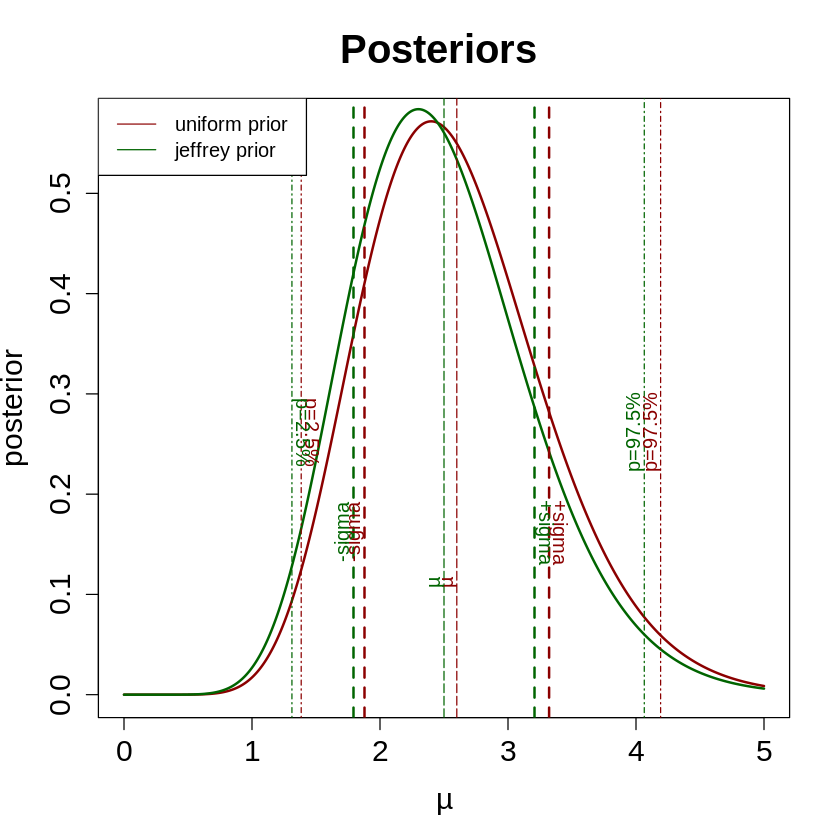

In [10]:
plot(mu,posterior_unif,type='l', lwd=2,col='darkred',xlab = 'µ', ylab = 'posterior', main='Posteriors ', cex.main=2, cex.lab=1.5, cex.axis=1.5)
lines(mu,posterior_jeffrey,type='l', lwd=2,col='darkgreen')
abline(v = mean_unif + sqrt(var_unif), col="darkred", lwd=2, lty=2)
abline(v = mean_unif - sqrt(var_unif), col="darkred", lwd=2, lty=2)
abline(v = mean_jeff + sqrt(var_jeff), col="darkgreen", lwd=2, lty=2)
abline(v = mean_jeff - sqrt(var_jeff), col="darkgreen", lwd=2, lty=2)
abline(v=mean_unif,col='darkred',lty=5)
abline(v=mean_jeff,col='darkgreen',lty=5)
abline(v=ciunif[1],col='darkred',lty=4)
abline(v=ciunif[2],col='darkred',lty=4)
abline(v=cijeff[1],col='darkgreen',lty=4)
abline(v=cijeff[2],col='darkgreen',lty=4)
text(mean_unif, 0.1, labels=expression("µ"),srt=90, pos=3, cex=1, col="darkred",  xpd=TRUE)
text(mean_jeff, 0.1, labels=expression("µ"),srt=90, pos=3, cex=1, col="darkgreen",  xpd=TRUE)
text(mean_unif + sqrt(var_unif), 0.15, labels=expression("+sigma"),srt=270, pos=3, cex=1, col="darkred",  xpd=TRUE)
text(mean_unif - sqrt(var_unif), 0.15, labels=expression("-sigma"),srt=90, pos=3, cex=1, col="darkred",  xpd=TRUE)
text(mean_jeff - sqrt(var_jeff), 0.15, labels=expression("-sigma"),srt=90, pos=3, cex=1, col="darkgreen",  xpd=TRUE)
text(mean_jeff + sqrt(var_jeff), 0.15, labels=expression("+sigma"),srt=270, pos=3, cex=1, col="darkgreen", xpd=TRUE)
text(ciunif[1], 0.25, labels=expression("p=2.5%"),srt=270, pos=3, cex=1, col="darkred",  xpd=TRUE)
text(ciunif[2], 0.25, labels=expression("p=97.5%"),srt=90, pos=3, cex=1, col="darkred",  xpd=TRUE)
text(cijeff[1], 0.25, labels=expression("p=2.5%"),srt=270, pos=3, cex=1, col="darkgreen",  xpd=TRUE)
text(cijeff[2], 0.25, labels=expression("p=97.5%"),srt=90, pos=3, cex=1, col="darkgreen", xpd=TRUE)
legend('topleft', legend=c("uniform prior", "jeffrey prior"),col=c("darkred", "darkgreen"), lty=1, cex=1)

##point c

The credibility interval in the normal approximation is calculated by
doing: mean +- 2\*standard_deviation

In [11]:
delta<-1/n_sample
sd_unif<-(var_unif)^(1/2)
post_norm_unif<-dnorm(mu,mean_unif,sd_unif)/(delta*sum(dnorm(mu,mean_unif,sd_unif)))


inf_lim_unif<-mean_unif-2*sd_unif
sup_lim_unif<-mean_unif+2*sd_unif
cin<-c(inf_lim_unif,sup_lim_unif)

cat('the credibility interval obtained with the normal approximation and uniform prior is [',inf_lim_unif,',',sup_lim_unif,']')
cat('\n')

the credibility interval obtained with the normal approximation and uniform prior is [ 1.157779 , 4.042221 ]


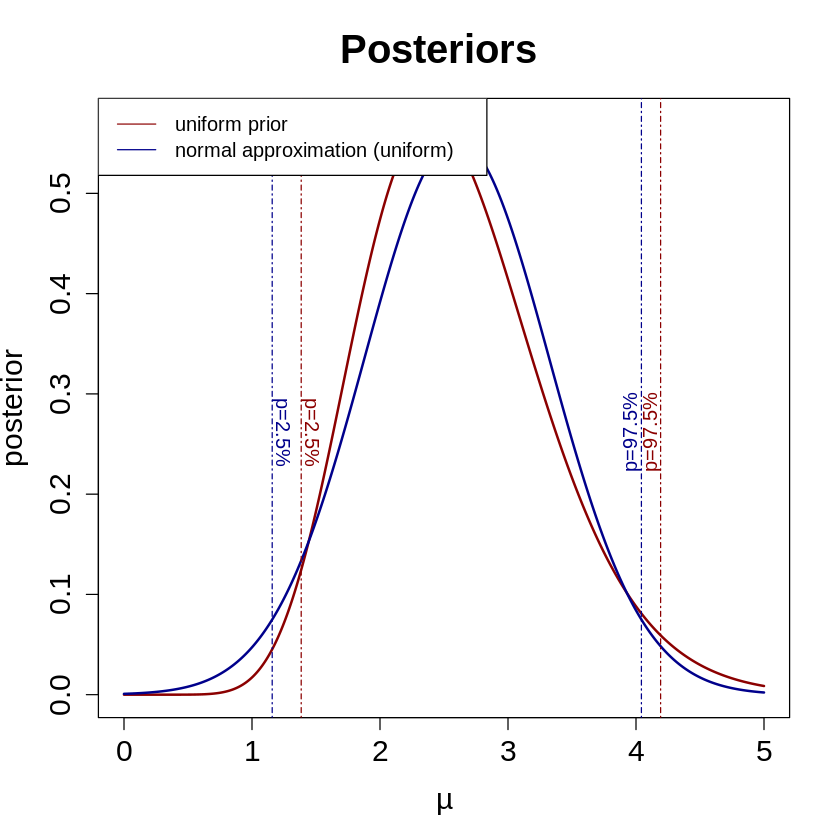

In [12]:
plot(mu,posterior_unif,type='l', lwd=2,col='darkred',xlab = 'µ', ylab = 'posterior', main='Posteriors ', cex.main=2, cex.lab=1.5, cex.axis=1.5)
lines(mu,post_norm_unif,type='l', lwd=2,col='darkblue')
abline(v=ciunif[1],col='darkred',lty=4)
abline(v=ciunif[2],col='darkred',lty=4)
abline(v=cin[1],col='darkblue',lty=4)
abline(v=cin[2],col='darkblue',lty=4)
text(ciunif[1], 0.25, labels=expression("p=2.5%"),srt=270, pos=3, cex=1, col="darkred",  xpd=TRUE)
text(ciunif[2], 0.25, labels=expression("p=97.5%"),srt=90, pos=3, cex=1, col="darkred",  xpd=TRUE)
text(cin[1], 0.25, labels=expression("p=2.5%"),srt=270, pos=3, cex=1, col="darkblue",  xpd=TRUE)
text(cin[2], 0.25, labels=expression("p=97.5%"),srt=90, pos=3, cex=1, col="darkblue", xpd=TRUE)
legend('topleft', legend=c("uniform prior", "normal approximation (uniform)"),col=c("darkred", "darkblue"), lty=1, cex=1)

In [13]:
delta<-1/n_sample
sd_jeff<-(var_jeff)^(1/2)
post_norm_jeff<-dnorm(mu,mean_jeff,sd_jeff)/(delta*sum(dnorm(mu,mean_jeff,sd_jeff)))



inf_lim_jeff<-mean_jeff-2*sd_jeff
sup_lim_jeff<-mean_jeff+2*sd_jeff
cinj<-c(inf_lim_jeff,sup_lim_jeff)

cat('the credibility interval obtained with the normal approximation and uniform prior is [',inf_lim_jeff,',',sup_lim_jeff,']')
cat('\n')

the credibility interval obtained with the normal approximation and uniform prior is [ 1.085786 , 3.914214 ]


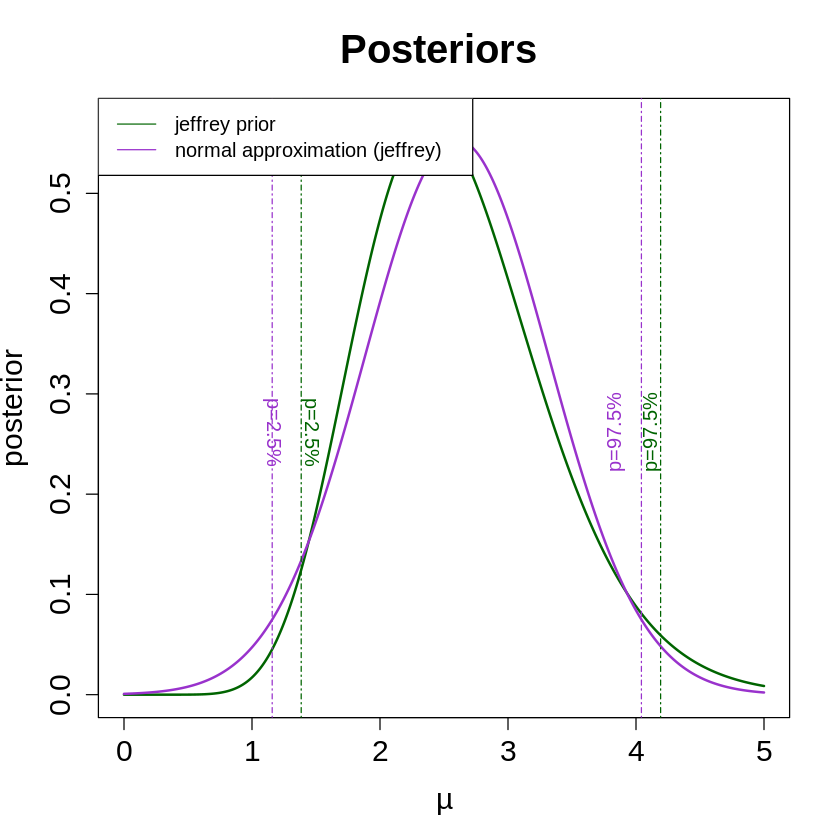

In [14]:
plot(mu,posterior_unif,type='l', lwd=2,col='darkgreen',xlab = 'µ', ylab = 'posterior', main='Posteriors ', cex.main=2, cex.lab=1.5, cex.axis=1.5)
lines(mu,post_norm_unif,type='l', lwd=2,col='darkorchid')
abline(v=ciunif[1],col='darkgreen',lty=4)
abline(v=ciunif[2],col='darkgreen',lty=4)
abline(v=cin[1],col='darkorchid',lty=4)
abline(v=cin[2],col='darkorchid',lty=4)
text(ciunif[1], 0.25, labels=expression("p=2.5%"),srt=270, pos=3, cex=1, col="darkgreen",  xpd=TRUE)
text(ciunif[2], 0.25, labels=expression("p=97.5%"),srt=90, pos=3, cex=1, col="darkgreen",  xpd=TRUE)
text(cinj[1], 0.25, labels=expression("p=2.5%"),srt=270, pos=3, cex=1, col="darkorchid",  xpd=TRUE)
text(cinj[2], 0.25, labels=expression("p=97.5%"),srt=90, pos=3, cex=1, col="darkorchid", xpd=TRUE)
legend('topleft', legend=c("jeffrey prior", "normal approximation (jeffrey)"),col=c("darkgreen", "darkorchid"), lty=1, cex=1)

In [15]:
cat('the credibility interval obtained with the uniform prior is [',ciunif[1],',',ciunif[2],']')
cat('\n')
cat('the crcedibility interval obtained with the normal approximation and uniform prior is [',cin[1],',',cin[2],']')
cat('\n')
cat('the credibility interval obtained with the jeffrey prior is [',cijeff[1],',',cijeff[2],']')
cat('\n')
cat('the credibility interval obtained with the normal approximation and uniform prior is [',cinj[1],',',cinj[2],']')

the credibility interval obtained with the uniform prior is [ 1.38439 , 4.192317 ]
the crcedibility interval obtained with the normal approximation and uniform prior is [ 1.157779 , 4.042221 ]
the credibility interval obtained with the jeffrey prior is [ 1.311972 , 4.064647 ]
the credibility interval obtained with the normal approximation and uniform prior is [ 1.085786 , 3.914214 ]

The credibility intervals calculated using the normal approximations are
similar to the original ones and the distances between the extrema are
similar too. The posteriors obtained with the approximations are similar
to the original ones

#Exercise 2

Lets initialize the needed variables

In [16]:
a_true<-1
b_true<-1
a_min<-0
a_max<-3
b_min<-0.1
b_max<-2
Nsamp<-1000
a <- seq(from = a_min, to = a_max,length.out = Nsamp)
b <- seq(from = b_min, to = b_max,length.out = Nsamp)
h_a<- (a_max-a_min)/Nsamp
h_b<- (b_max-b_min)/Nsamp

The likelihood is a cauchy distribution. Here I define the
log-likelihood.

In [17]:
log_like<-function(x,a,b){
  
  out<-0
  for (i in x) {
        out <- out + log((b/(pi*(b^2+(i-a)^2))))
    }
    return(out)
}

The prior is a uniform distribution. Here I define the log-prior.

In [18]:
log_prior <- function(a, b){
    p <- log(dunif(a, a_min, a_max)) + log(dunif(b, b_min, b_max))
    return(p)
}

The resulting unnormalized log-posterior is defined

In [19]:
log_post_lh_unnorm<-function(x,a,b){
  
  out<-log_like(x,a,b) + log_prior(a,b)
  
  return(out)

}

The countours plots are than shown

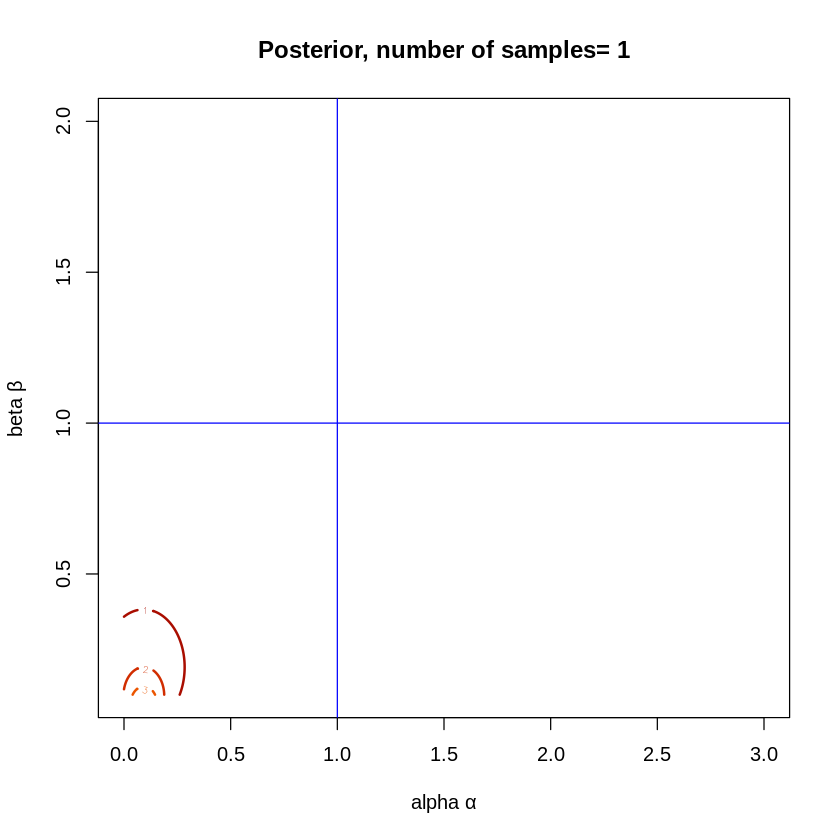

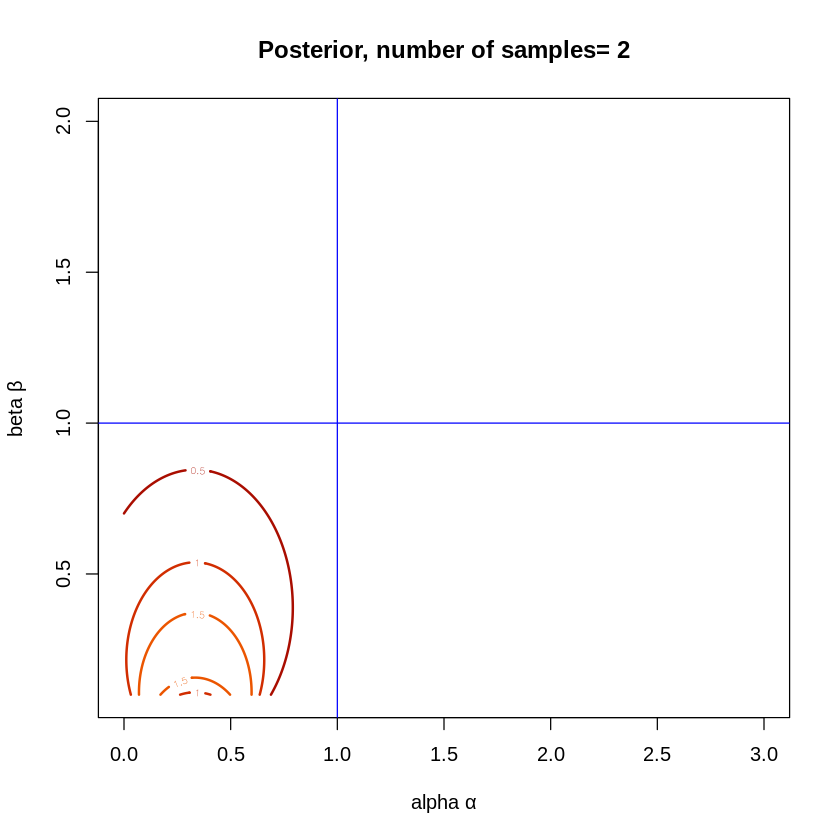

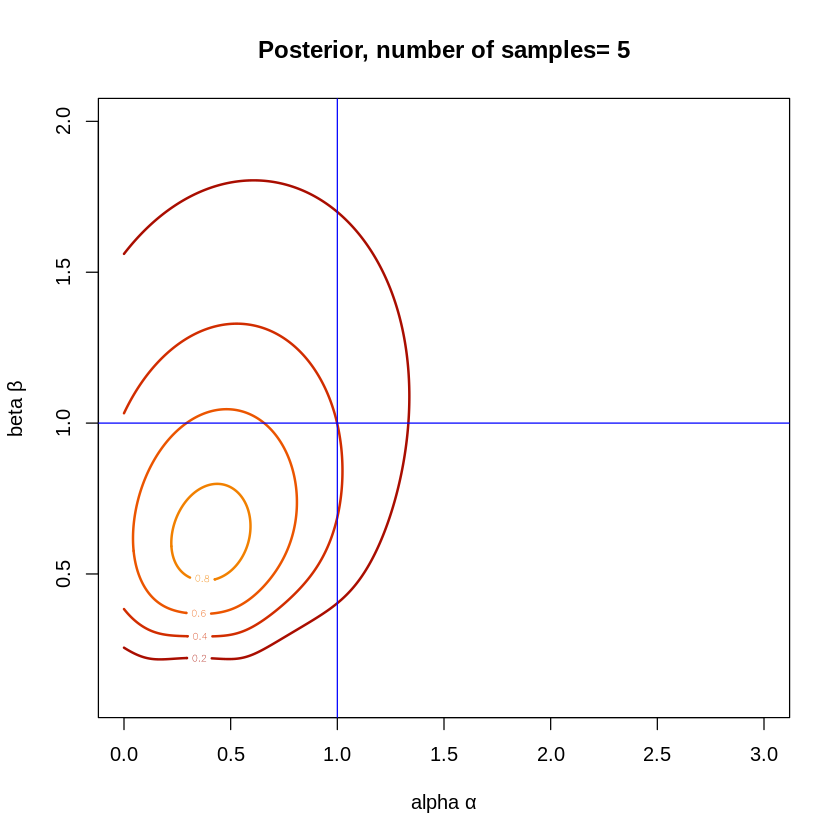

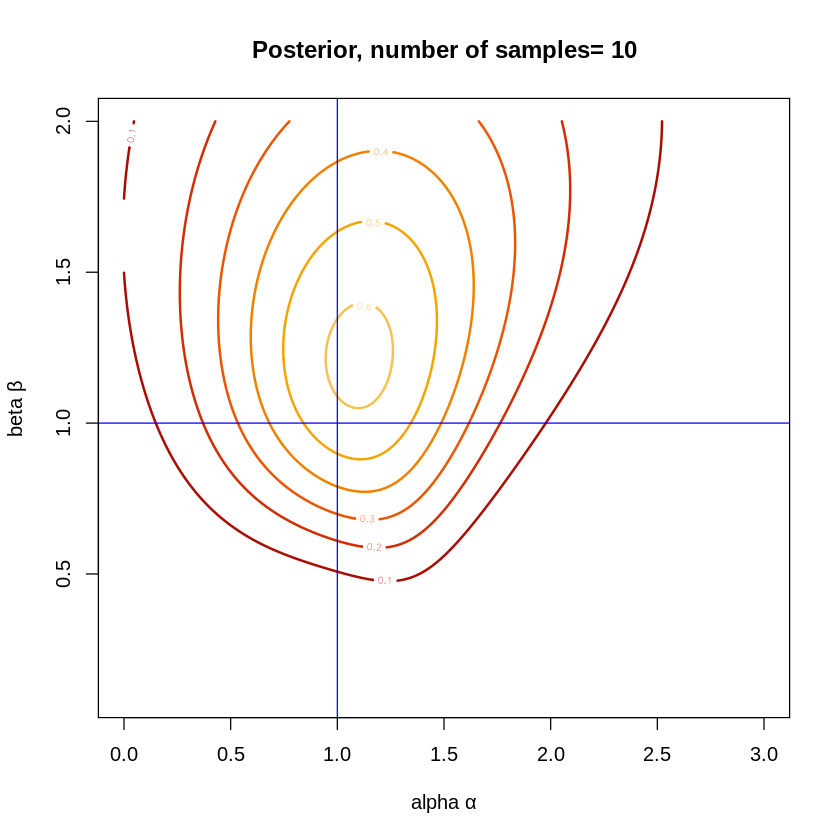

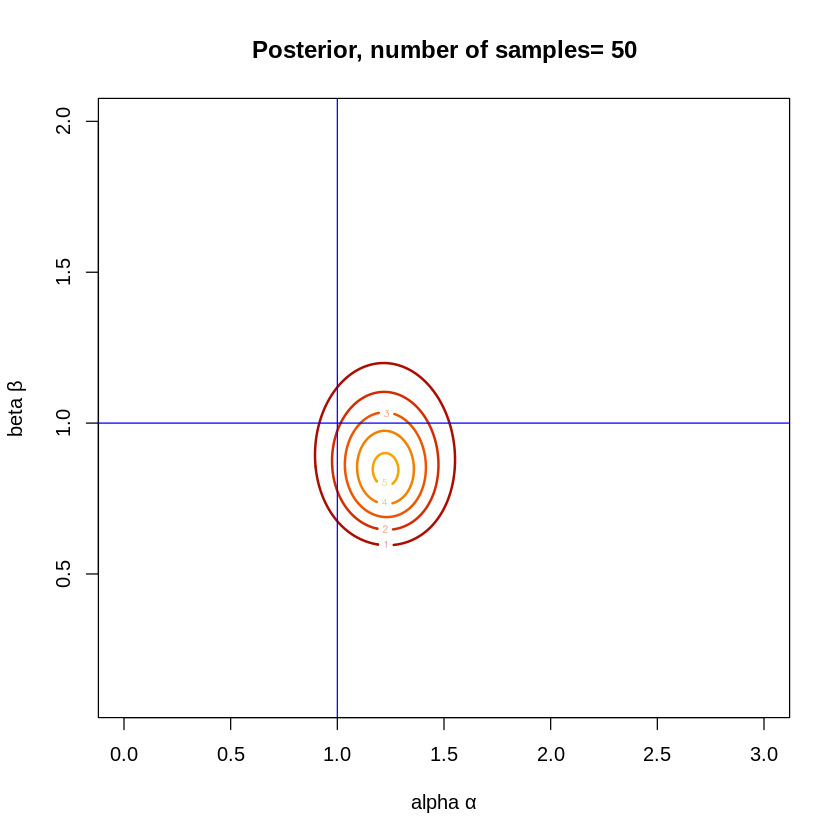

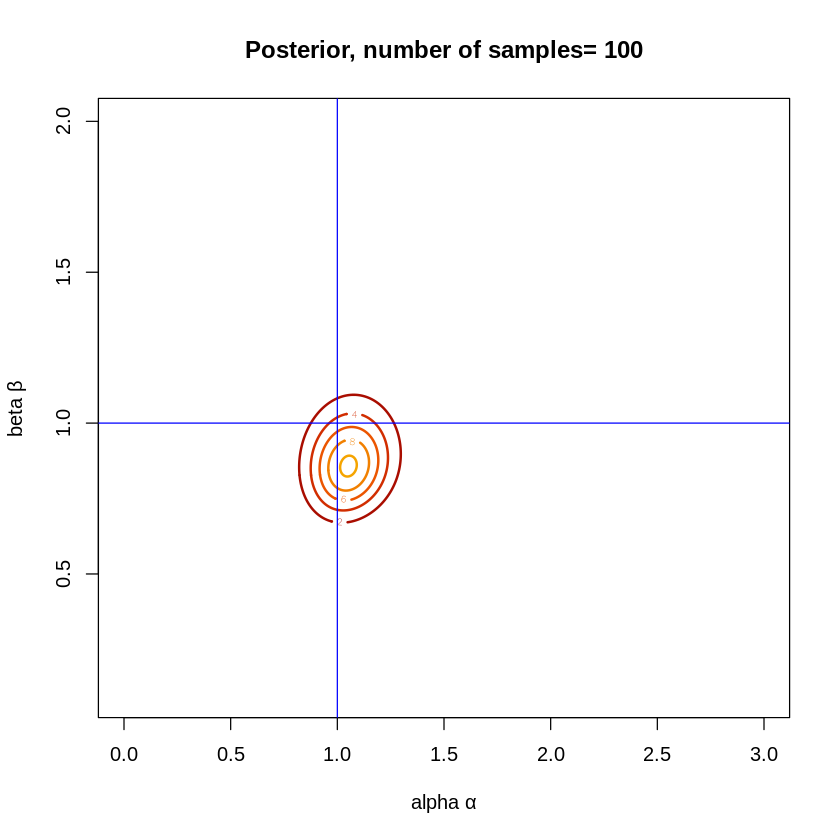

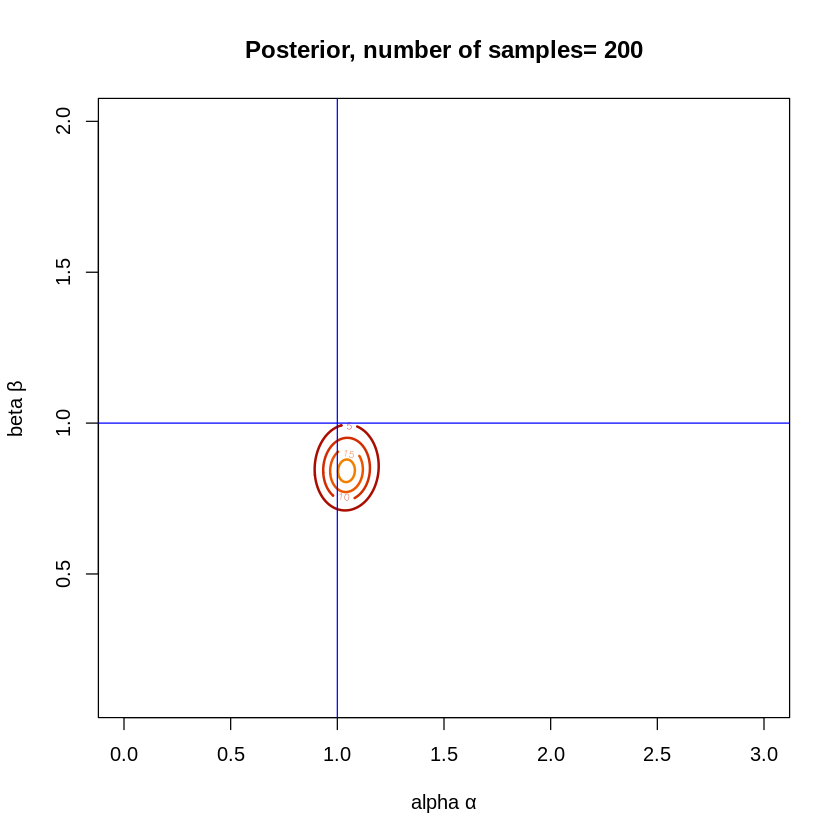

In [20]:
n_vec<-c(1,2,5,10,50,100,200)


for (n in n_vec) {
  set.seed(1)
  theta_k = runif(n, min = -pi/2, max = +pi/2)
  x = b_true*tan(theta_k)+a_true
  
  post <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
  for(j in 1:length(a)) {
    for(k in 1:length(a)) {
      post[j,k] <- exp(log_post_lh_unnorm(x,a[j], b[k]))
    } 
  }
  
  post_norm<-post/(h_a*h_b*sum(post))

  cols <- hcl.colors(10, "YlOrRd")
  
  contour(a, b, post_norm,
          nlevels = 5,
          labcex = 0.5,
          main = sprintf('Posterior, number of samples= %g',n),
          lwd = 2, lty = 1, xlab="alpha α", ylab="beta β",col=cols)
  
  abline(v=1,h=1,col='blue')
  
  
  
}

The posteriors are plotted too.

Warning message in persp.default(a, b, z, lwd = 0.01, ticktype = "detailed", col = colors[z.facet.range], :
“"boxe" is not a graphical parameter”
Warning message in title(main = main, sub = sub, ...):
“"boxe" is not a graphical parameter”
Warning message in persp.default(a, b, z, lwd = 0.01, ticktype = "detailed", col = colors[z.facet.range], :
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”


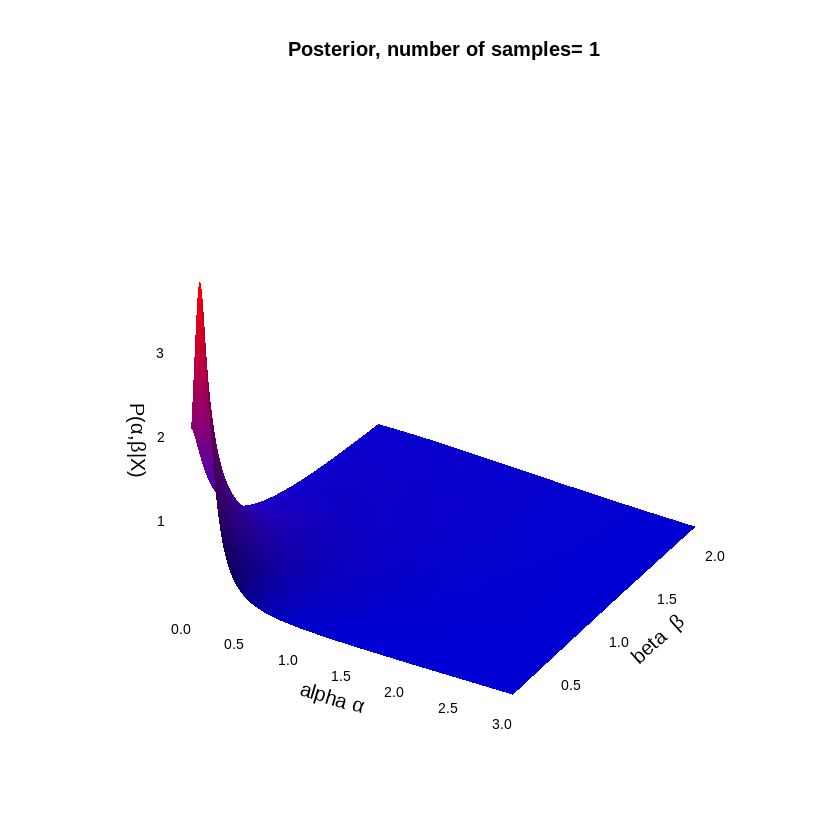

Warning message in title(main = main, sub = sub, ...):
“"boxe" is not a graphical parameter”
Warning message in persp.default(a, b, z, lwd = 0.01, ticktype = "detailed", col = colors[z.facet.range], :
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”


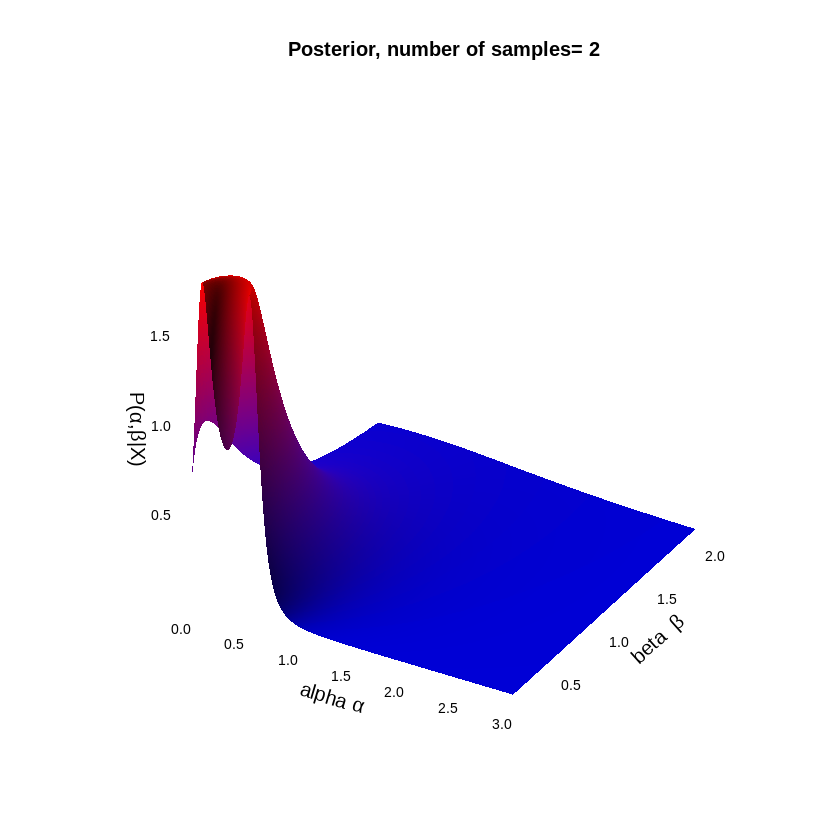

Warning message in title(main = main, sub = sub, ...):
“"boxe" is not a graphical parameter”
Warning message in persp.default(a, b, z, lwd = 0.01, ticktype = "detailed", col = colors[z.facet.range], :
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”


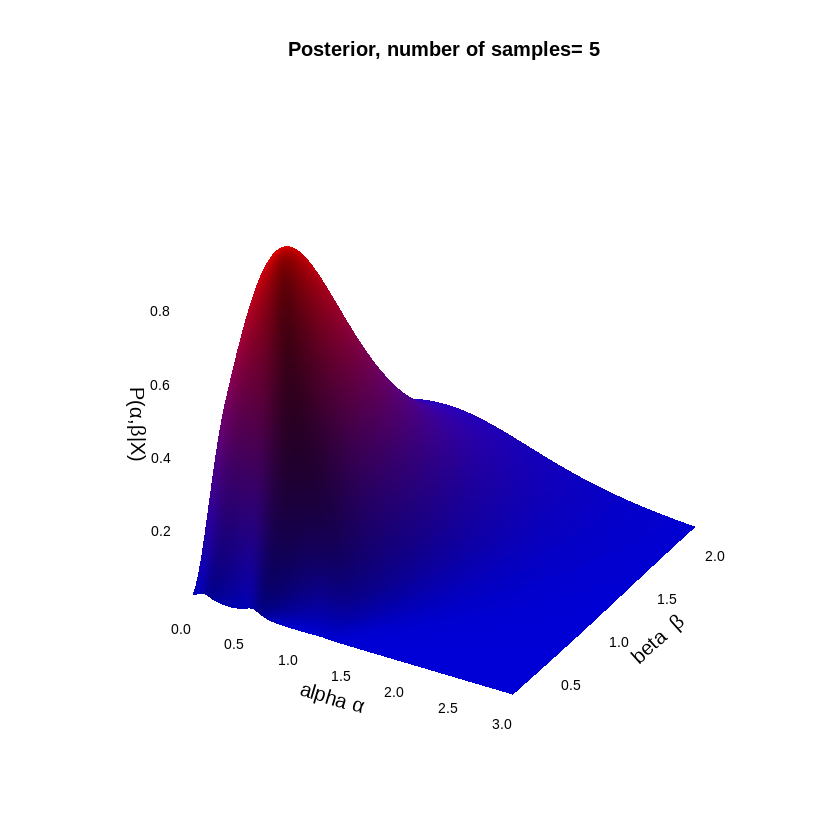

Warning message in title(main = main, sub = sub, ...):
“"boxe" is not a graphical parameter”
Warning message in persp.default(a, b, z, lwd = 0.01, ticktype = "detailed", col = colors[z.facet.range], :
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”


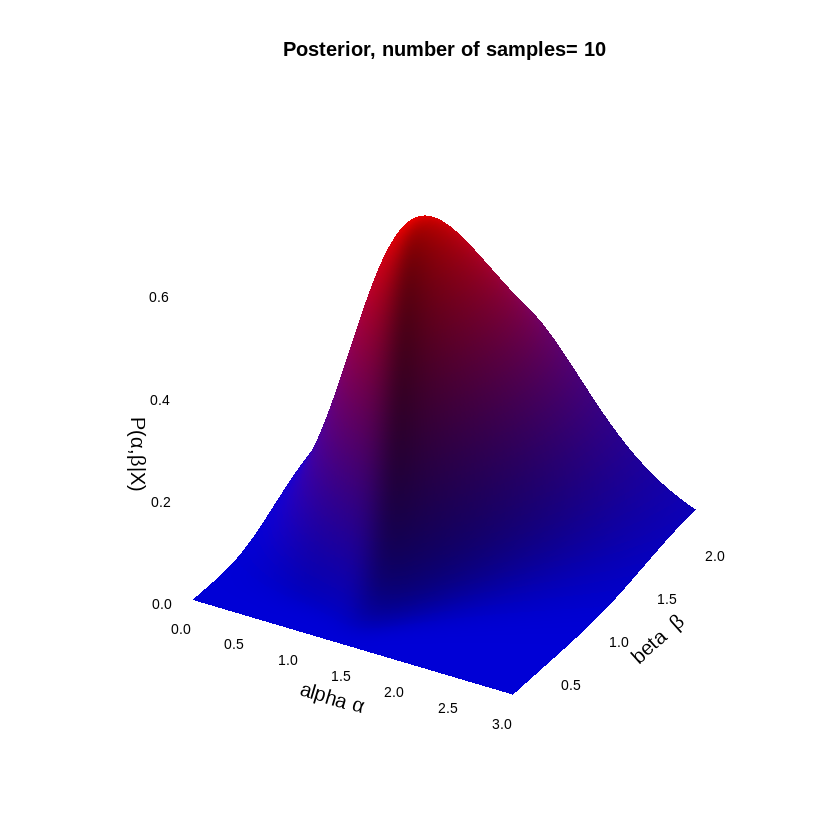

Warning message in title(main = main, sub = sub, ...):
“"boxe" is not a graphical parameter”
Warning message in persp.default(a, b, z, lwd = 0.01, ticktype = "detailed", col = colors[z.facet.range], :
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”


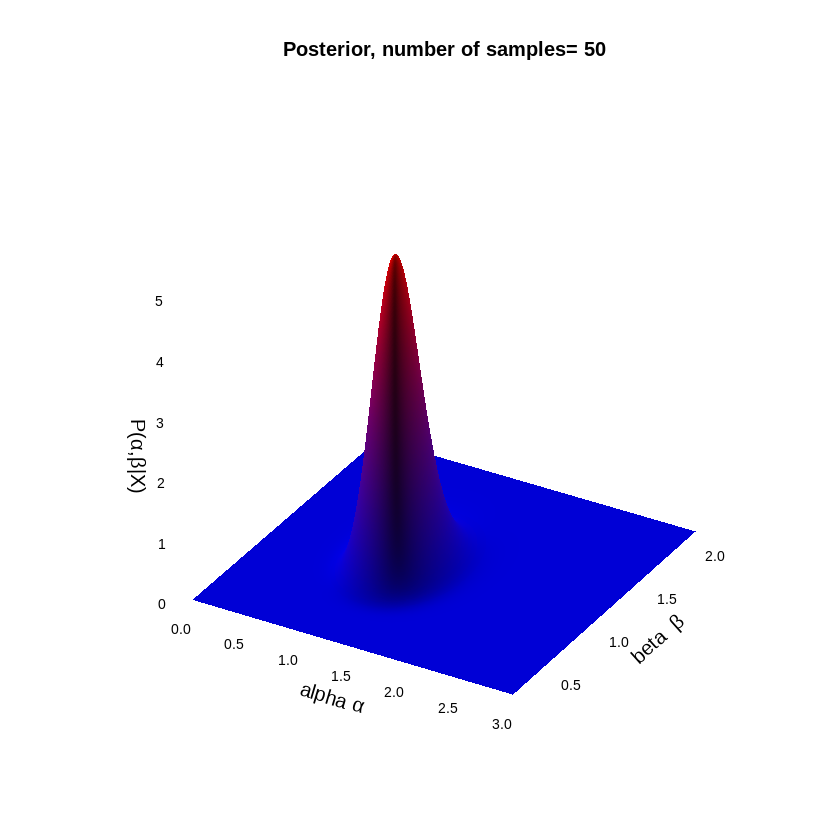

Warning message in title(main = main, sub = sub, ...):
“"boxe" is not a graphical parameter”
Warning message in persp.default(a, b, z, lwd = 0.01, ticktype = "detailed", col = colors[z.facet.range], :
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”
Warning message in doTryCatch(return(expr), name, parentenv, handler):
“"boxe" is not a graphical parameter”


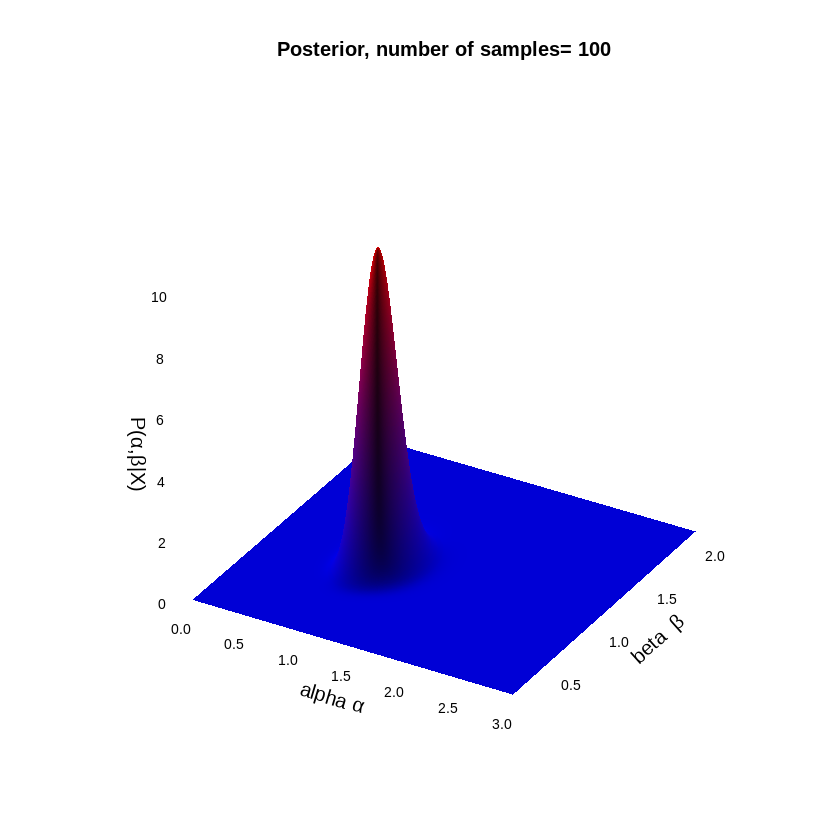

Warning message in title(main = main, sub = sub, ...):
“"boxe" is not a graphical parameter”


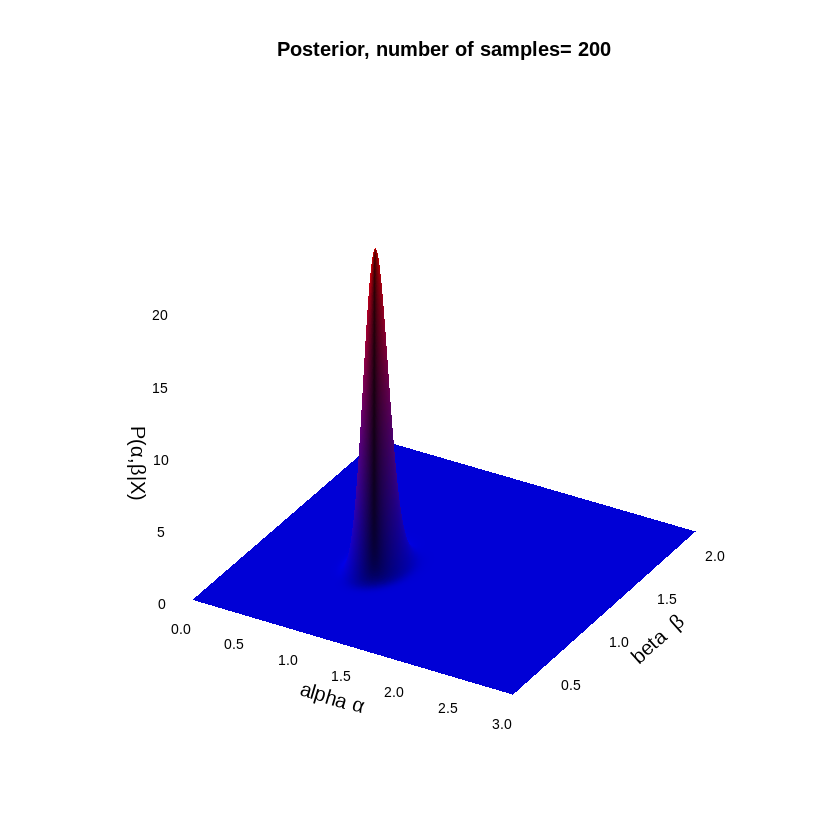

In [21]:
n_vec<-c(1,2,5,10,50,100,200)


for (n in n_vec) {
  set.seed(1)
  theta_k = runif(n, min = -pi/2, max = +pi/2)
  x = b_true*tan(theta_k)+a_true
  
  post <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
  for(j in 1:length(a)) {
    for(k in 1:length(a)) {
      post[j,k] <- exp(log_post_lh_unnorm(x,a[j], b[k]))
    } 
  }
  
  post_norm<-post/(h_a*h_b*sum(post))
  
  z<-post_norm

  col.pal<-colorRampPalette(c("blue", "red"))
  colors<-col.pal(100)

  z.facet.center <- (z[-1, -1] + z[-1, -ncol(z)] + z[-nrow(z), -1] + z[-nrow(z), -ncol(z)])/4

  z.facet.range<-cut(z.facet.center, 100)


  persp(a,b,z,lwd=0.01, ticktype="detailed",col=colors[z.facet.range],cex.lab=1, cex.axis=0.7, cex.main=1,
          xlim=c(a_min,a_max),
          ylim=c(b_min,b_max),
          xlab = 'alpha α',
          ylab = 'beta  β',
          zlab = 'P(α,β|X)',
          main = sprintf('Posterior, number of samples= %g',n),
          theta=30, phi=30, d=50.0, shade=0.25, border = 1,boxe=TRUE)
  
}

It is interesting to notice that using more samples the posterior
becomes more peaked and the center of the distribution tends to go to
the true values.

#Exercise 3

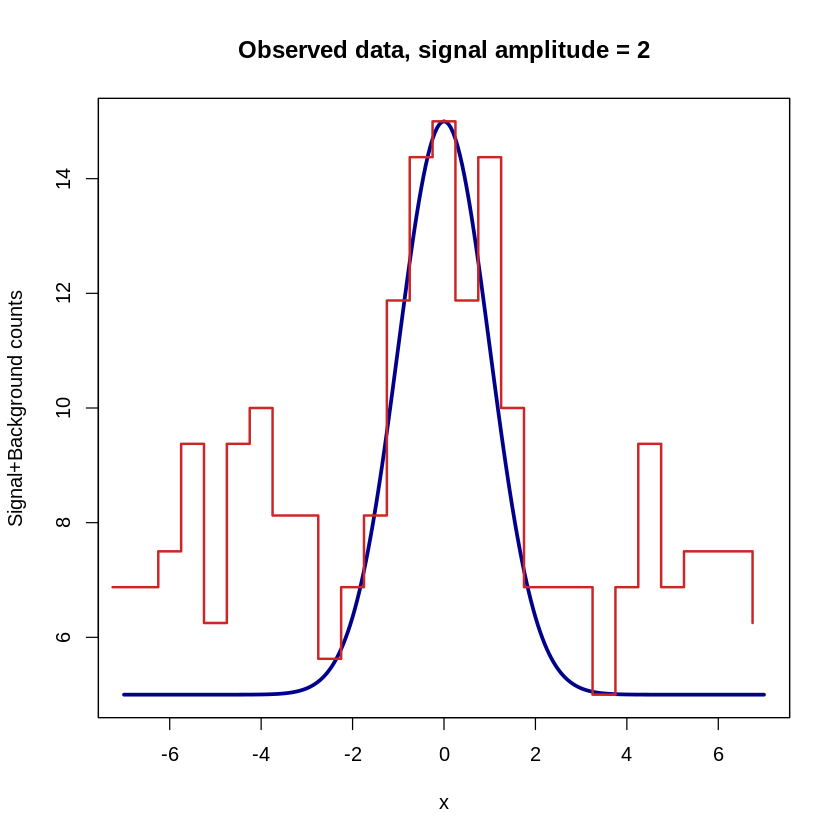

In [22]:
signal <- function(x, a, b, x0, w, t) { t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}
x0 <- 0
w <-1 
A_true <- 2 
B_true <- 1 
Delta_t <- 5

set.seed(1)
xdat <- seq(from=-7*w, to=7*w, by=0.5*w)

s_true <- signal(xdat, A_true, B_true, x0, w, Delta_t) 

ddat <- rpois(length(s_true), s_true)
xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
splot <- signal(xplot, A_true, B_true, x0, w, Delta_t) 
plot(xplot, splot,xlab="x", ylab="Signal+Background counts",type='l', lwd=3, col='darkblue',main =sprintf('Observed data, signal amplitude = %g',A_true), cex.lab=1, cex.axis=1)
par(new=TRUE)
xdat_off <- xdat-0.25
plot(xdat_off, ddat, type='s',col='firebrick3',lwd=2,xlim=range(xplot), ylim=range(c(splot, ddat)),xlab='',ylab='',xaxt ="n",yaxt ="n")

In [23]:
alim <- c(0.0, 4.0)
blim <- c(0.5, 1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim)/Nsamp
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid
b <- blim[1] + diff(blim)*uniGrid

Here the log posterior is defined

In [24]:
log_post <- function(d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf)} 
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

##point a -RESOLUTION ANALLYSIS

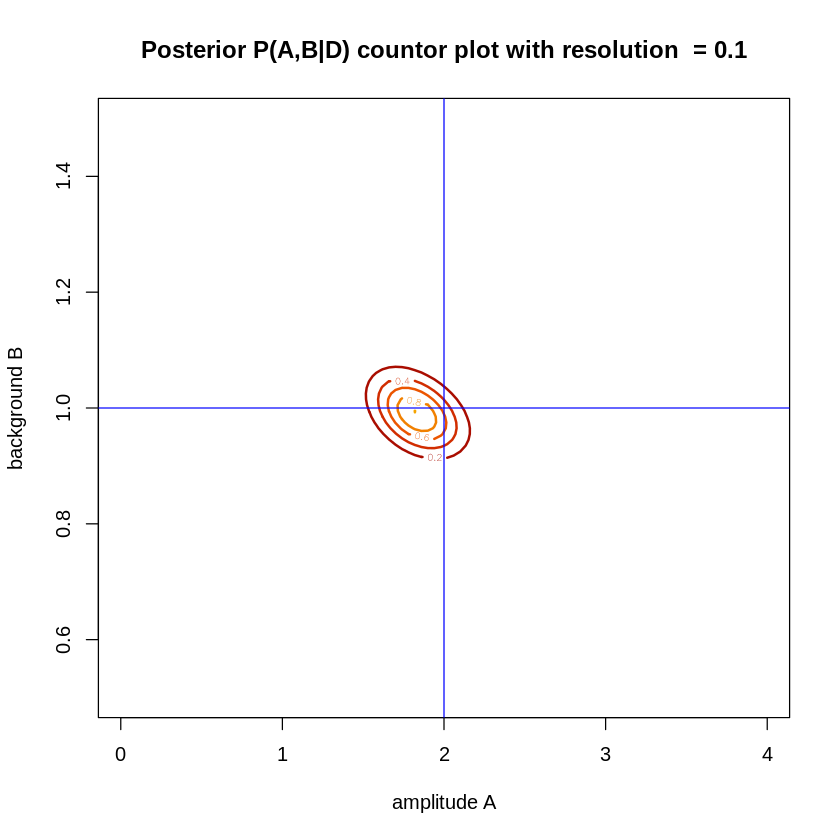

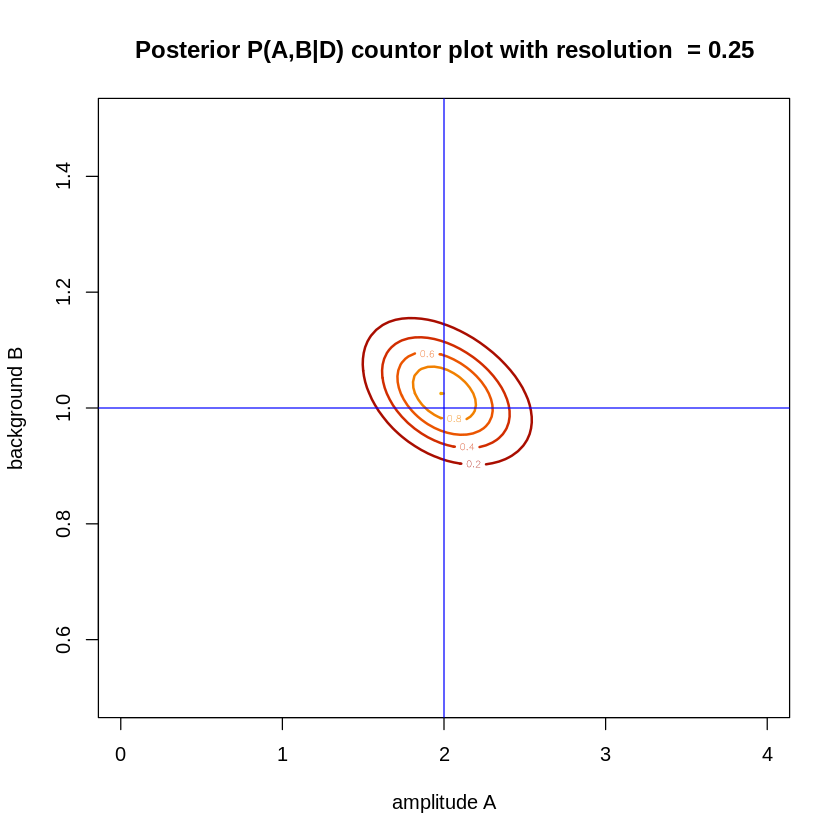

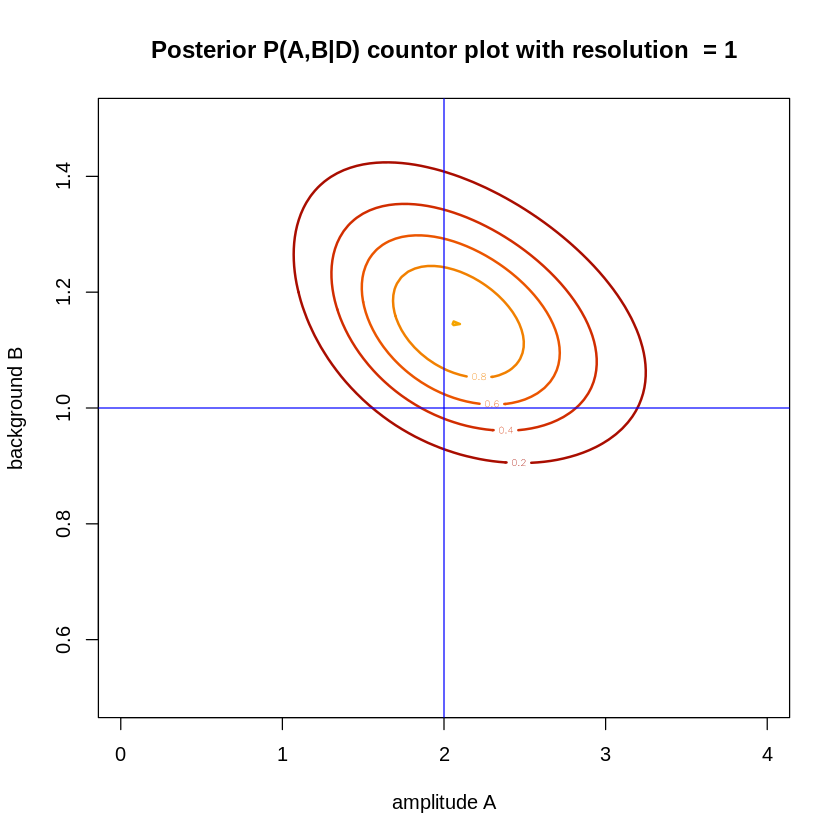

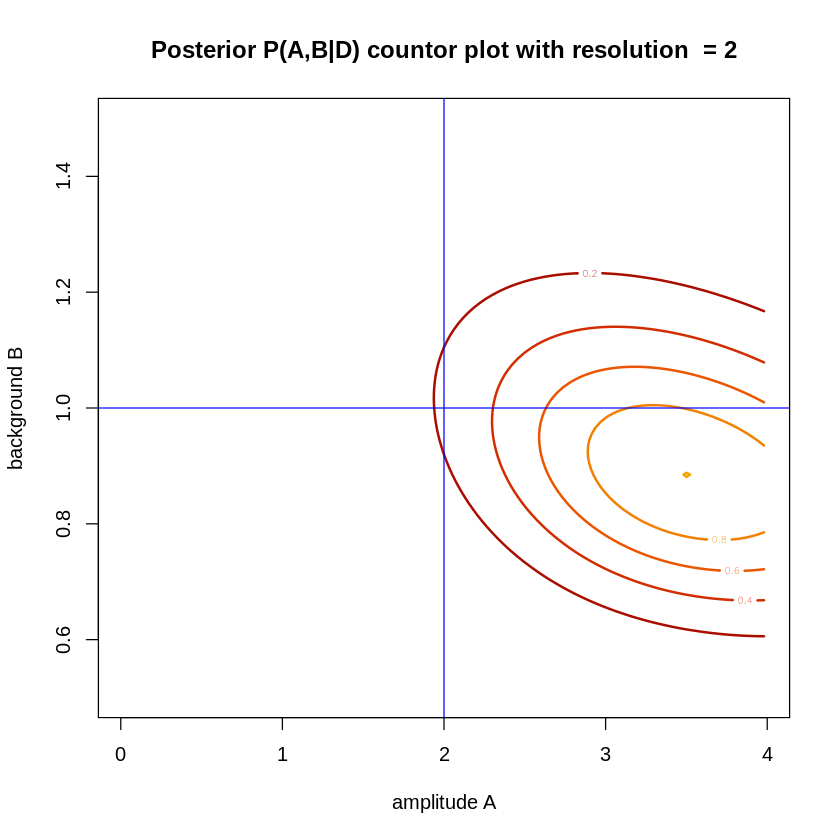

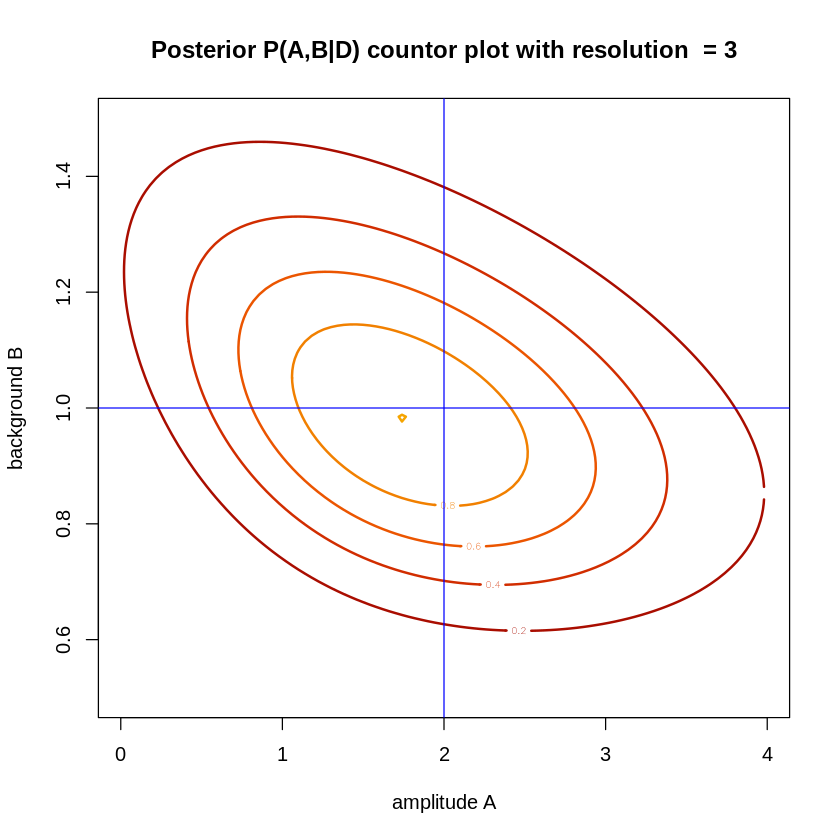

In [25]:
res<-c(0.1, 0.25, 1, 2, 3)

for (r in res) {
  
  set.seed(1)
  xdat <- seq(from=-7*w, to=7*w, by=r*w)
  s_true <- signal(xdat, A_true, B_true, x0, w, Delta_t) 
  ddat <- rpois(length(s_true), s_true)
  
  z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
  for(j in 1:length(a)) {
    for(k in 1:length(b)) {
      z[j,k] <- log_post(ddat, xdat, a[j], b[k], x0, w, Delta_t)
    } 
  }

  z <- z - max(z) 
  
  cols <- hcl.colors(10, "YlOrRd")
  
  contour(a, b, exp(z),
          nlevels = 5,
          labcex = 0.5,
          main=sprintf("Posterior P(A,B|D) countor plot with resolution  = %g",r),
          lwd = 2, xlab="amplitude A", ylab="background B",col = cols)

  abline(v=A_true,h=B_true,col="blue")
  
  
}

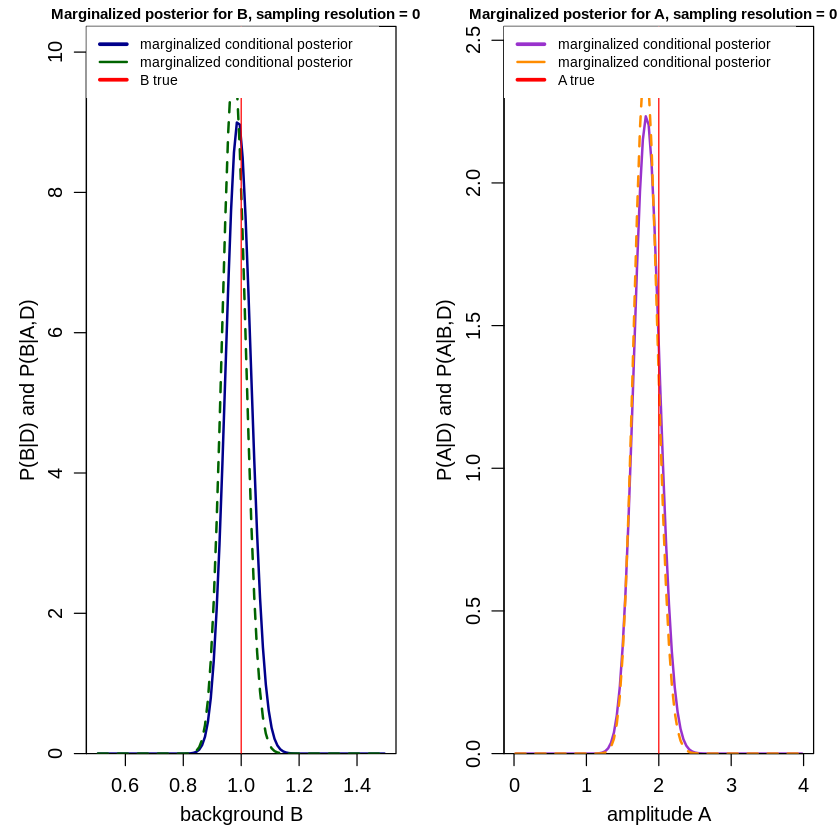

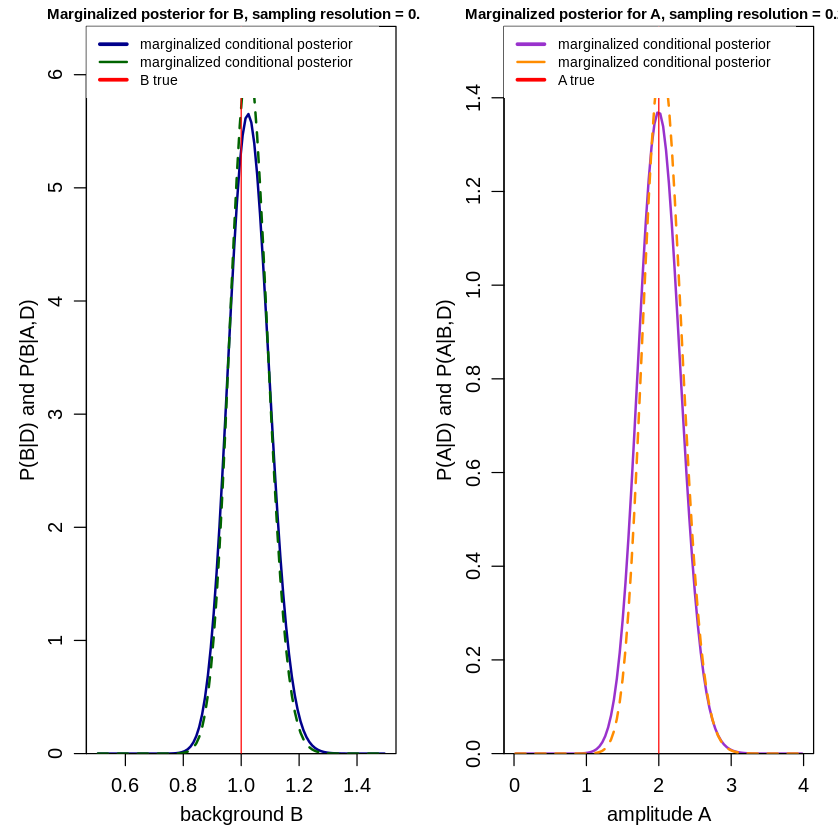

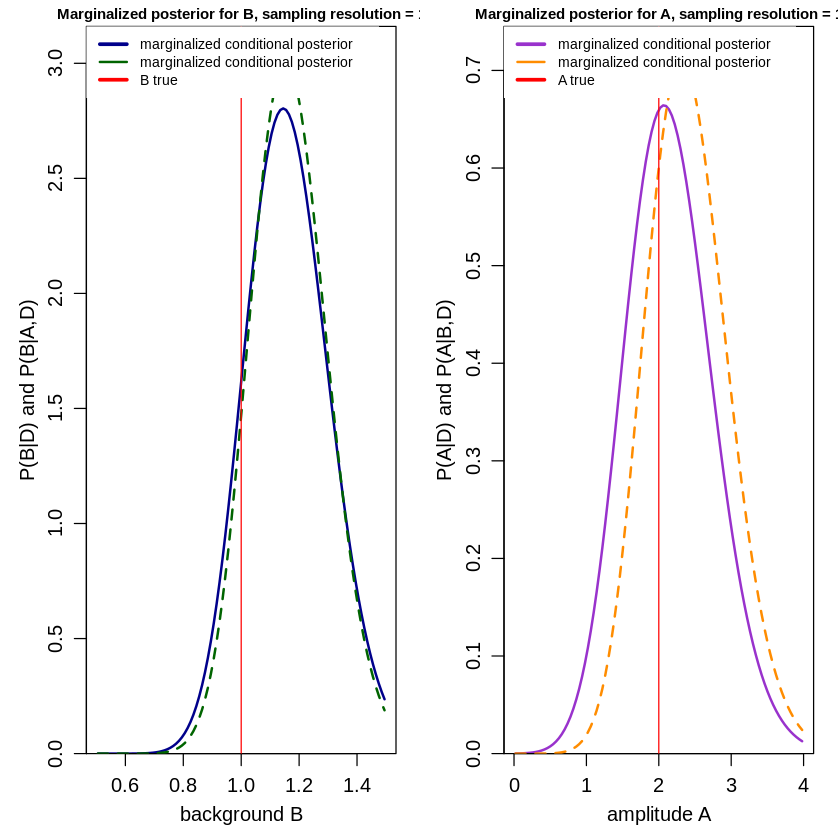

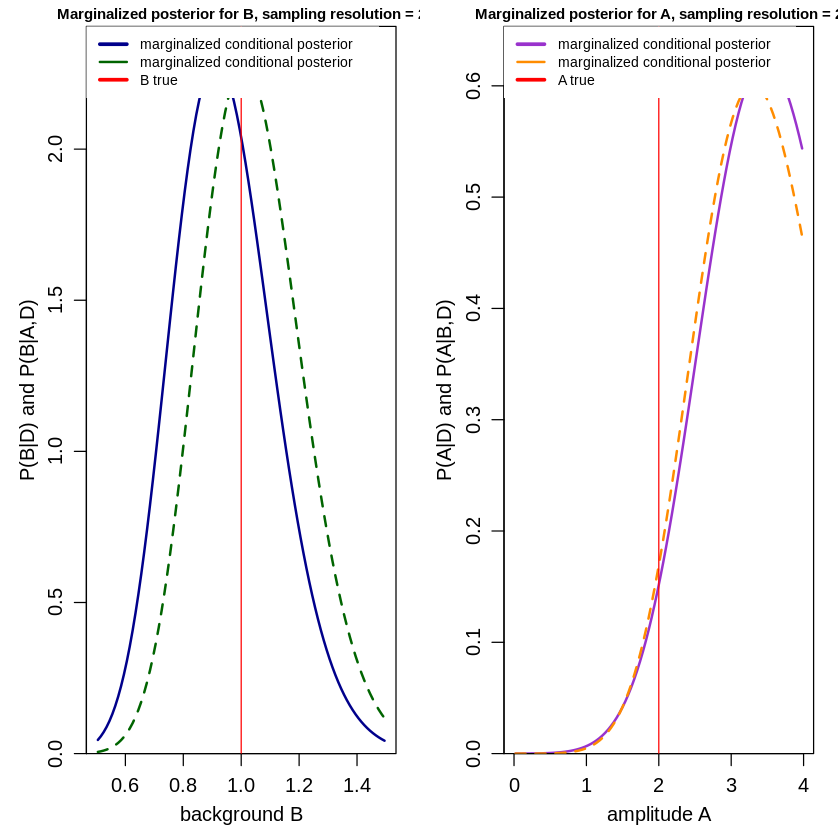

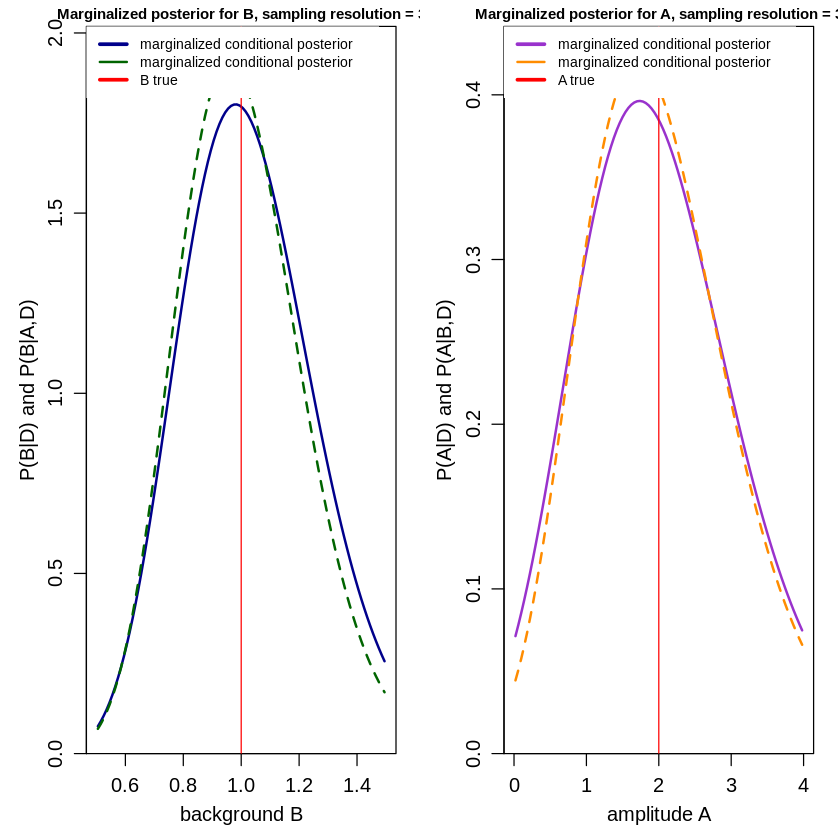

In [26]:
for (r in res) {
  
  set.seed(1)
  xdat <- seq(from=-7*w, to=7*w, by=r*w)
  s_true <- signal(xdat, A_true, B_true, x0, w, Delta_t) 
  ddat <- rpois(length(s_true), s_true)
  
  
  z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
  for(j in 1:length(a)) {
    for(k in 1:length(b)) {
      z[j,k] <- log_post(ddat, xdat, a[j], b[k], x0, w, Delta_t)
    } 
  }

  z <- z - max(z)
  
  p_a_D <- apply(exp(z), 1, sum)
  p_a_D <- p_a_D/(delta_a*sum(p_a_D))
  p_b_D <- apply(exp(z), 2, sum) 
  p_b_D <- p_b_D/(delta_b*sum(p_b_D))
 
  p_a_bD <- exp(Vectorize(log_post, "a")(ddat, xdat, a, B_true,x0, w, Delta_t))
  p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
  p_b_aD <- exp(Vectorize(log_post, "b")(ddat, xdat, A_true, b,x0, w, Delta_t))
  p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
  
  par(mfrow=c(1.5,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
  
  plot(b, p_b_D, xlab="background B", yaxs="i",ylim=1.05*c(0,max(p_b_D, p_b_aD)),
       ylab="P(B|D) and P(B|A,D)", main = sprintf('Marginalized posterior for B, sampling resolution = %g',r),type="l", lwd=2, cex.main=0.75,col='darkblue')
  lines(b, p_b_aD, lwd=2, lty=2,col='darkgreen') 
  abline(v=B_true, col="red")
  legend("topleft", inset=c(0,0), legend=c("marginalized conditional posterior","marginalized conditional posterior","B true"),col=c("darkblue","darkgreen","red"), lty = c(1,1), lwd = c(3,2), cex=0.7, box.lty = 0)
  
  
  plot(a, p_a_D, xlab="amplitude A", yaxs="i",ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)",
       type="l",main = sprintf('Marginalized posterior for A, sampling resolution = %g',r), lwd=2, cex.main=0.75,col='darkorchid')
  lines(a, p_a_bD, lwd=2, lty=2,col='darkorange') 
  abline(v=A_true, col="red")
  legend("topleft", inset=c(0,0), legend=c("marginalized conditional posterior","marginalized conditional posterior","A true"),col=c("darkorchid","darkorange","red"), lty = c(1,1), lwd = c(3,2), cex=0.7, box.lty = 0)
  
  
}

It is easy to see that with a lower resolution means a more peaked
posterior distribution. This means that there is less error in the
values predicted. A lower resolution means also that the center of the
posterior is nearer to the true values. It is interesting to notice that
the posterior distribution with the center closest to the true values is
the second lowest resolution (w=0.25) and not the lowest one (w=0.1).

##point b - A/B RATIO ANALYSIS

In [27]:
alim <- c(0.0, 60)
blim <- c(0.5, 1.5)
Nsamp <- 1000
uniGrid <- seq(from=1/(2*Nsamp),to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim)/Nsamp
delta_b <- diff(blim)/Nsamp
a <- alim[1] + diff(alim)*uniGrid
b <- blim[1] + diff(blim)*uniGrid

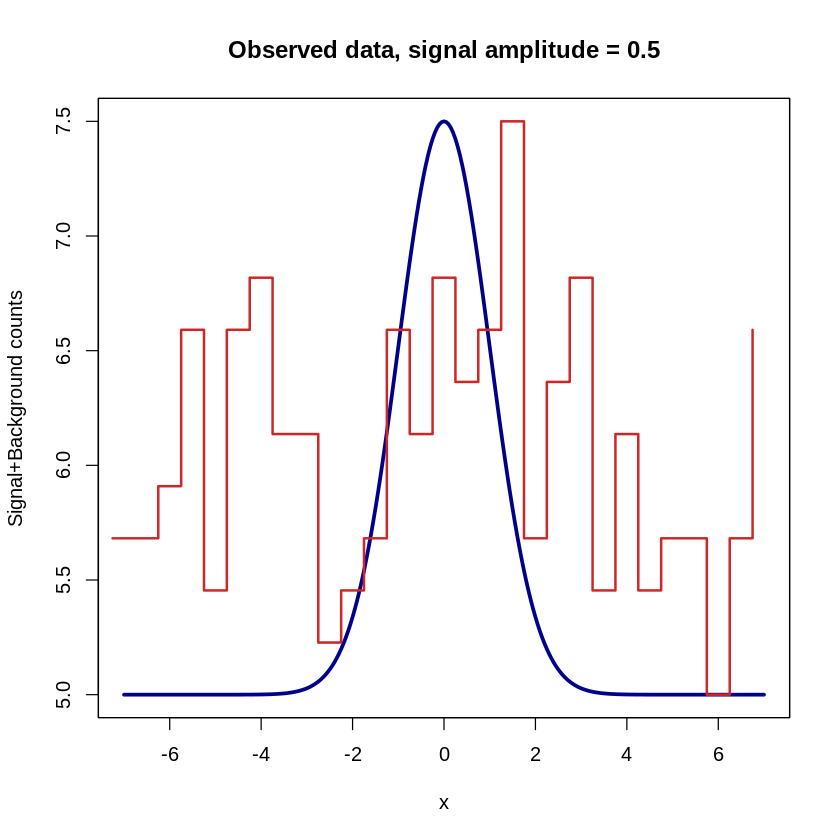

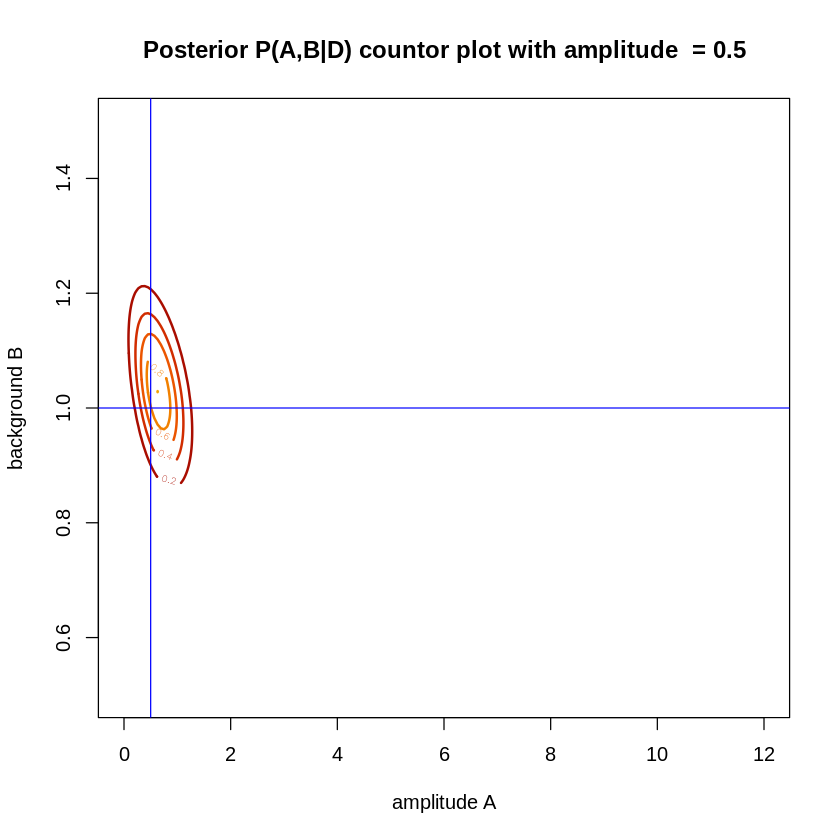

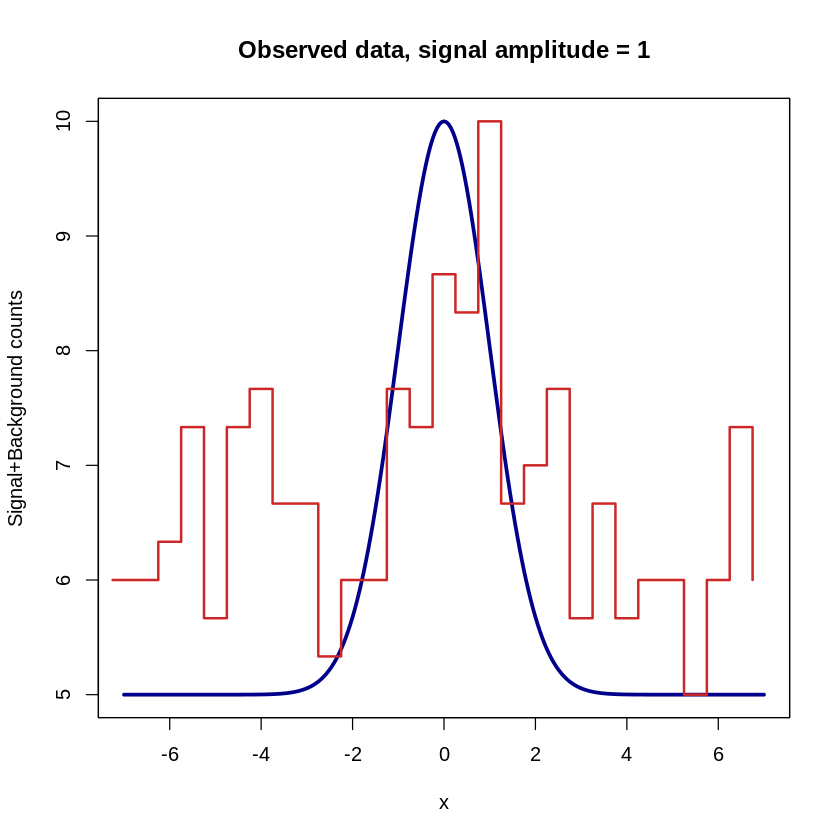

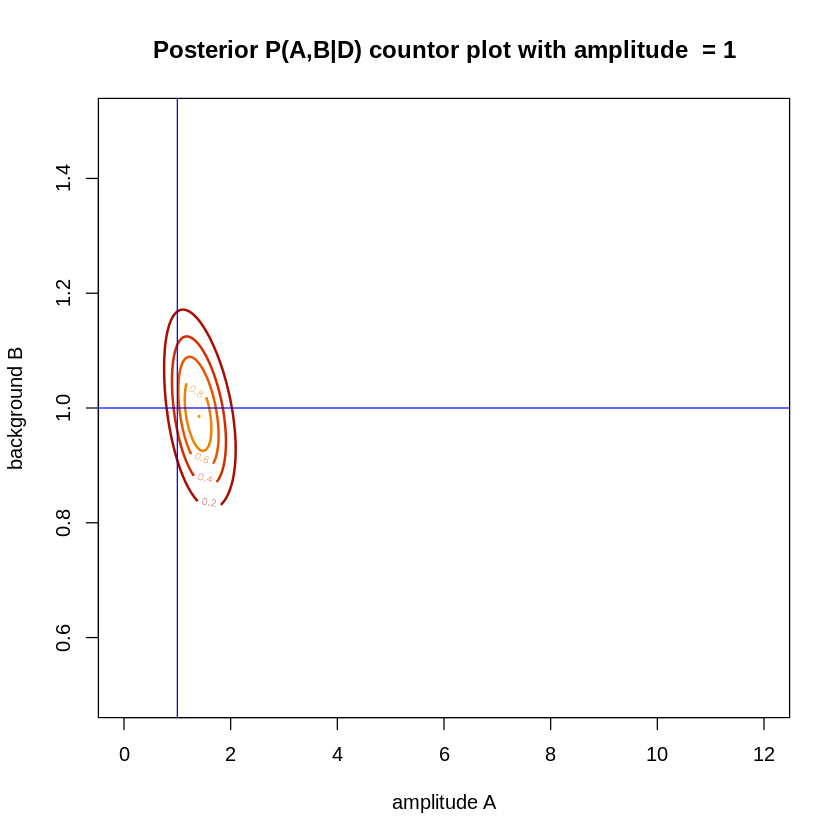

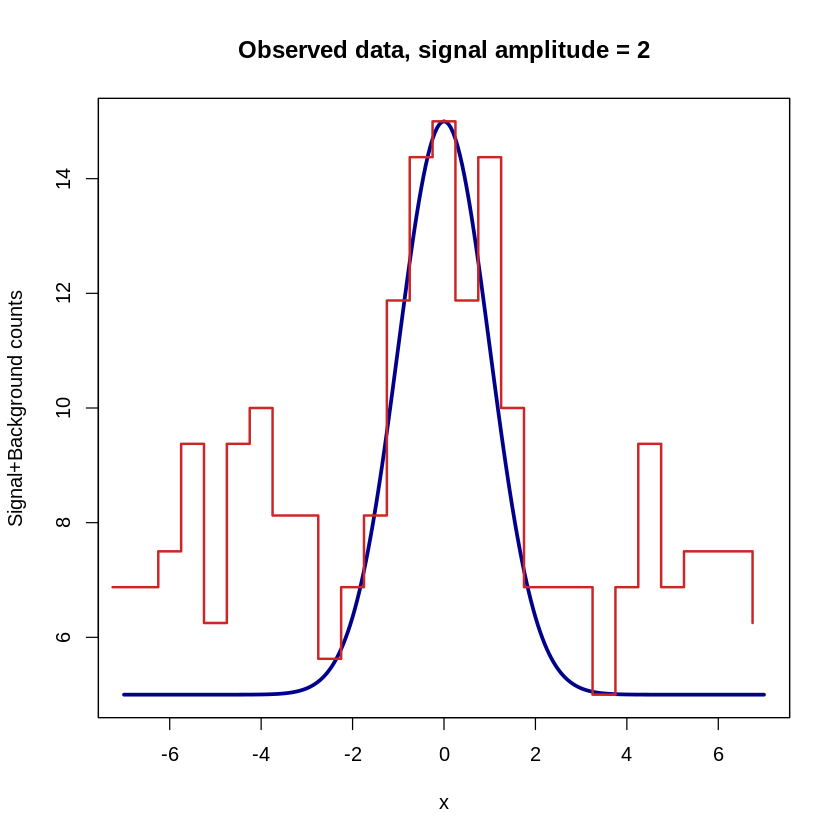

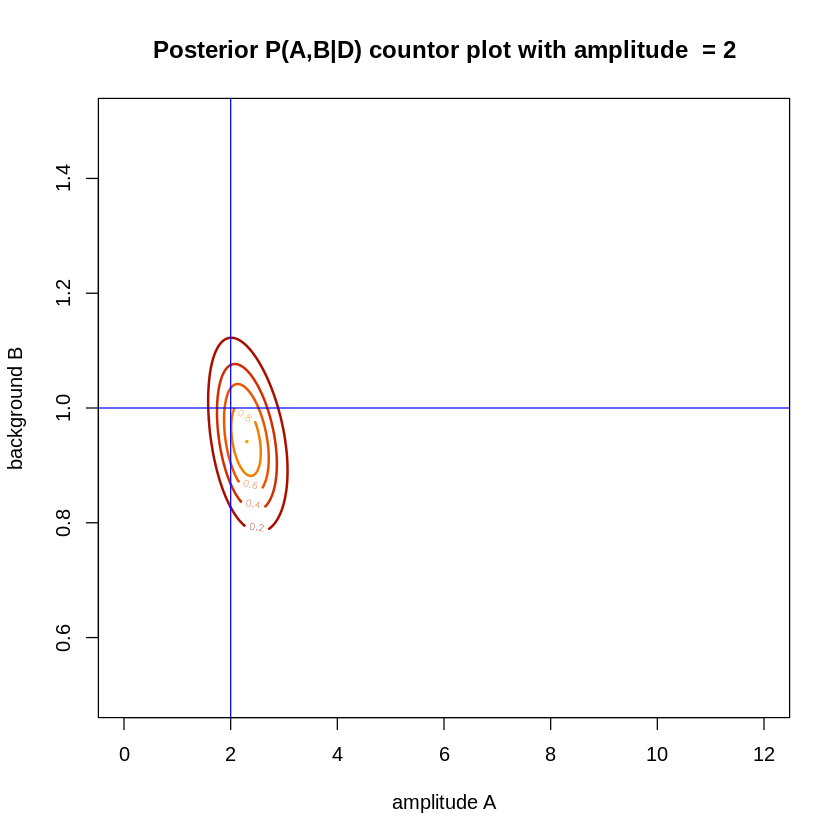

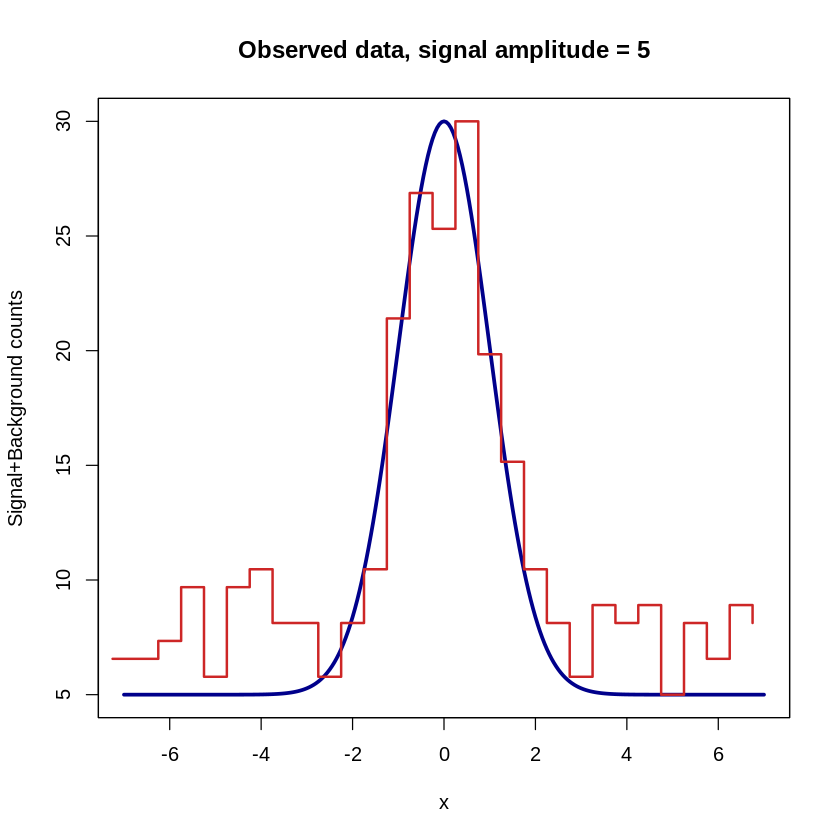

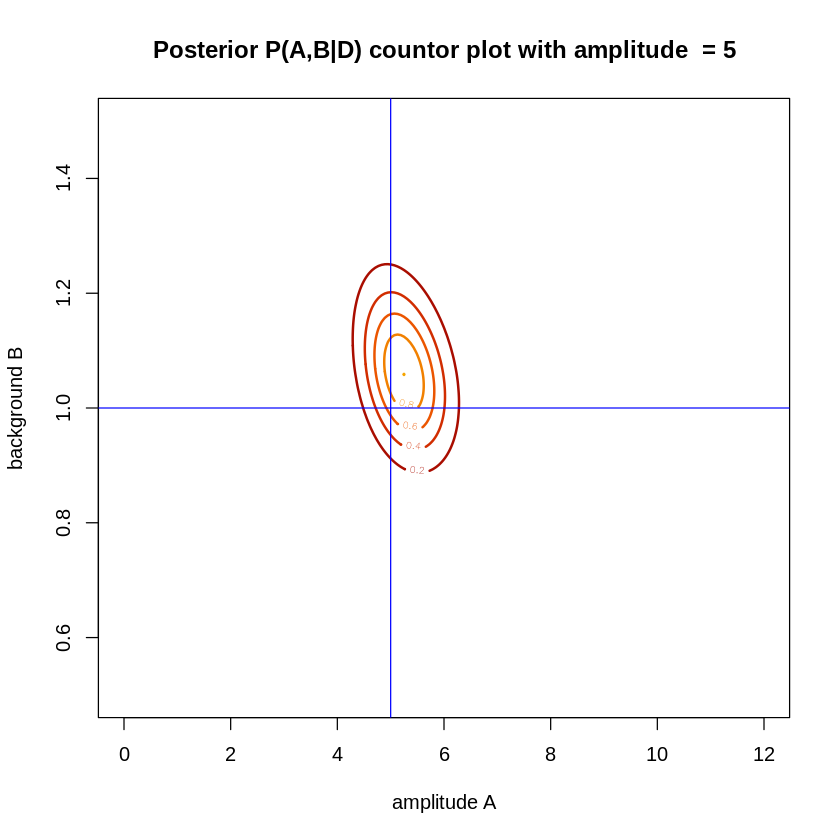

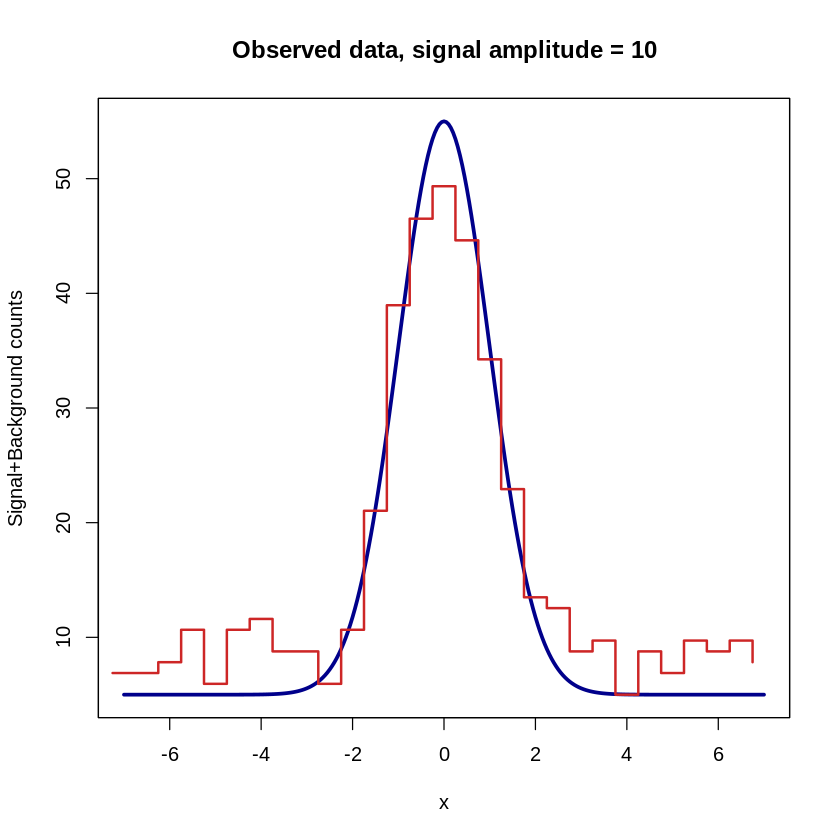

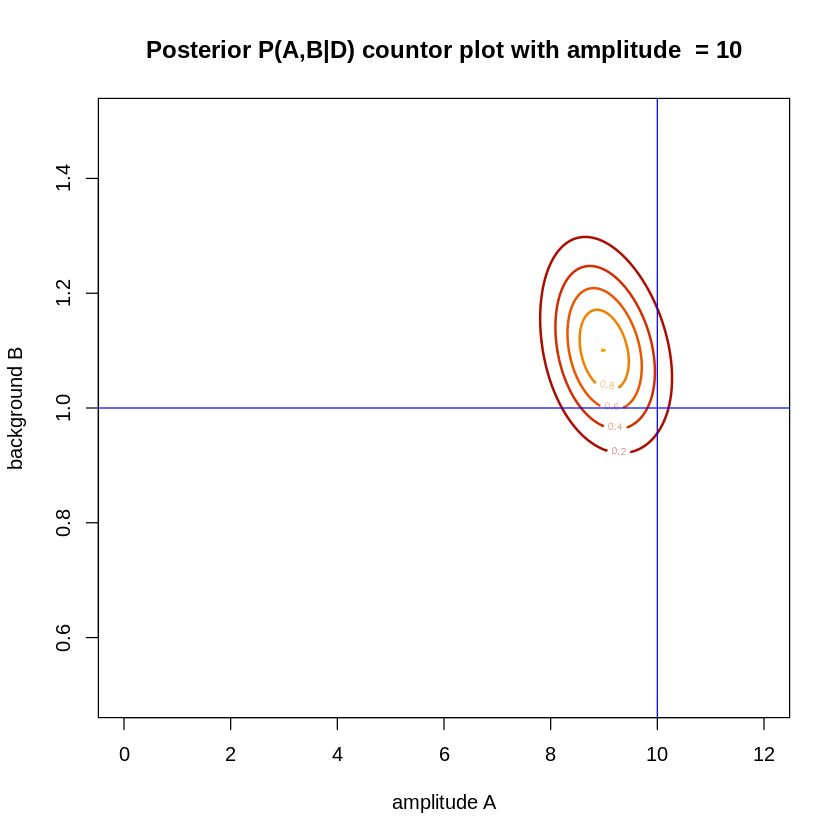

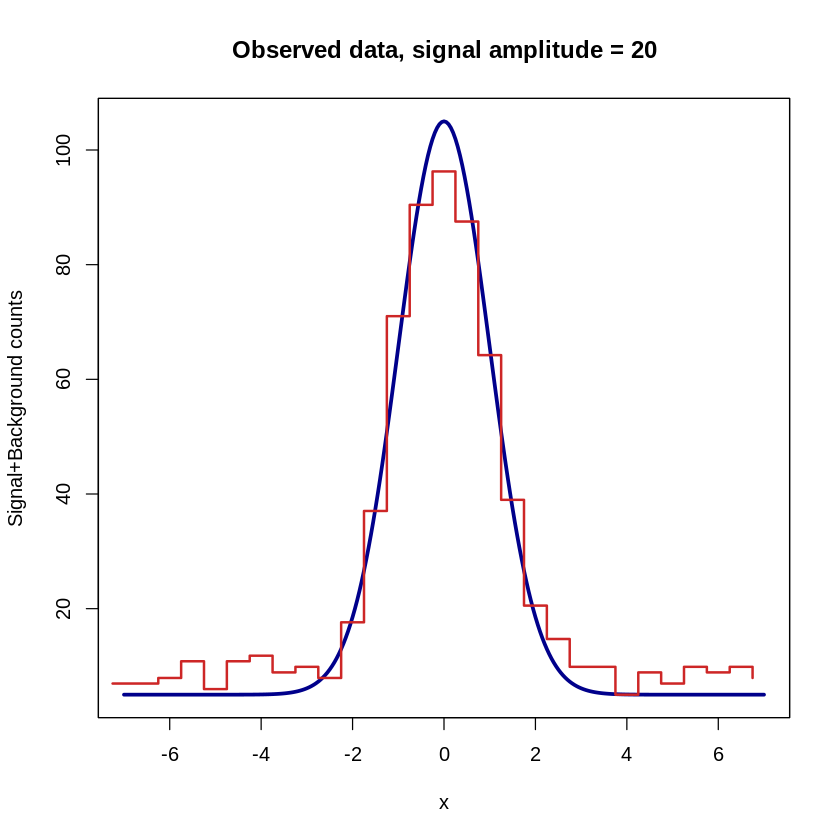

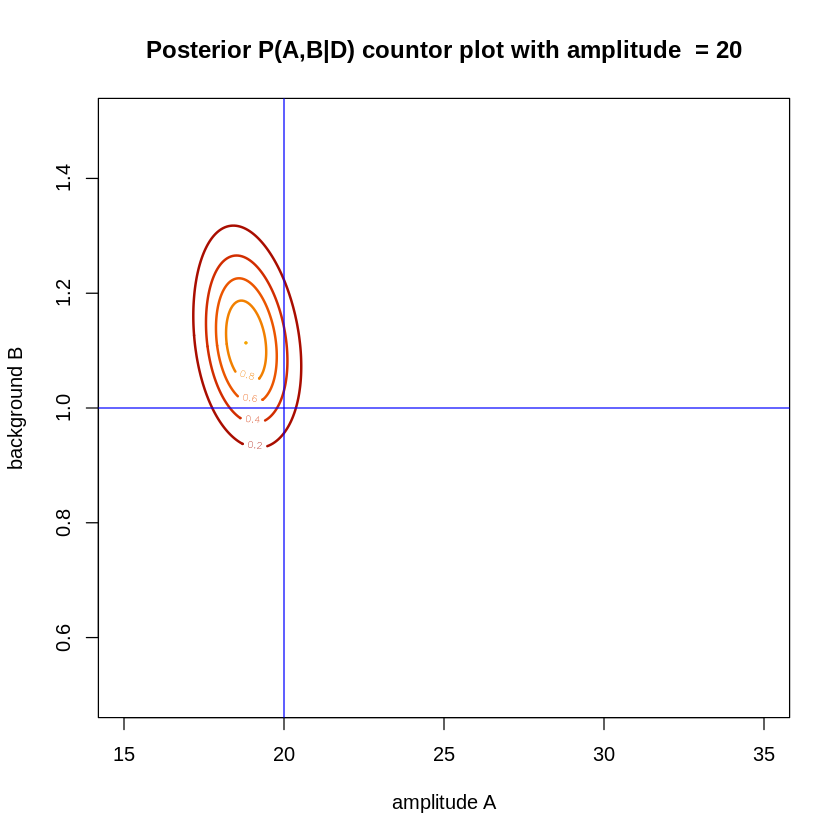

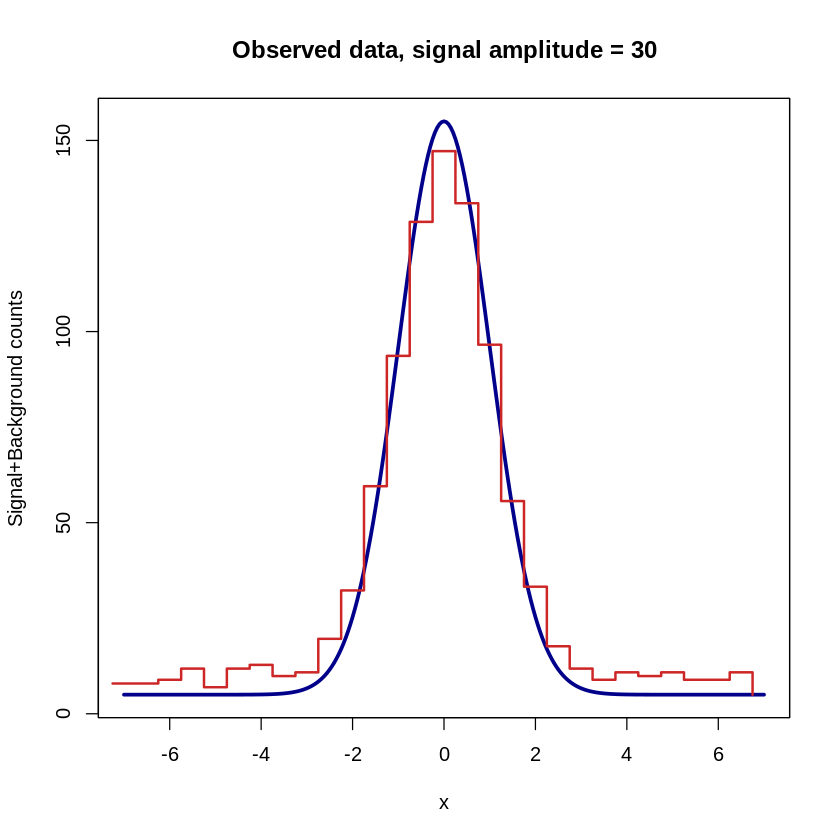

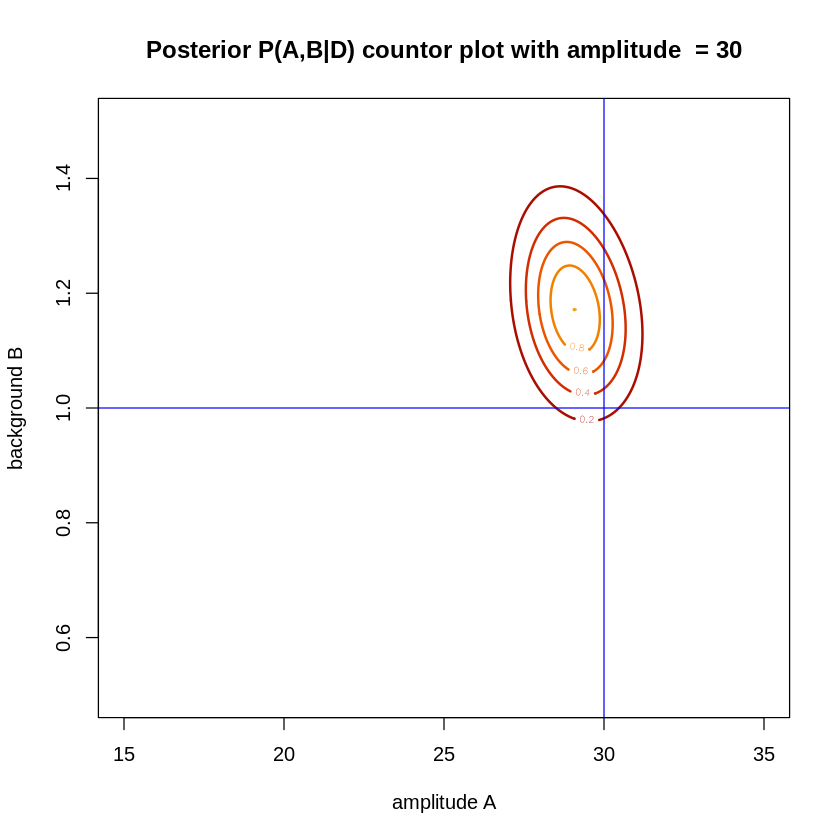

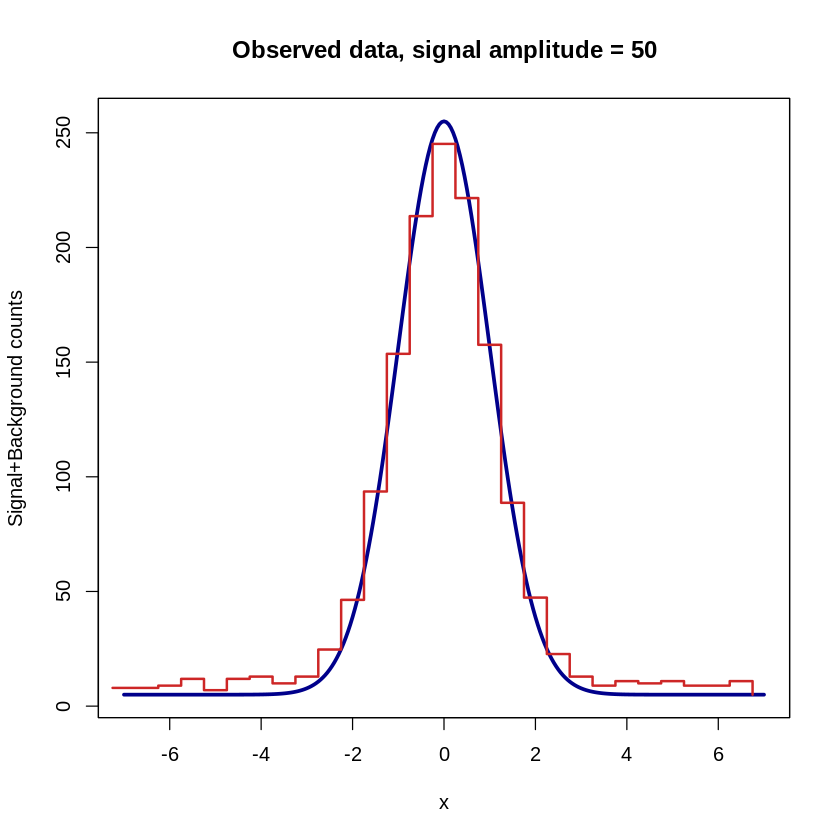

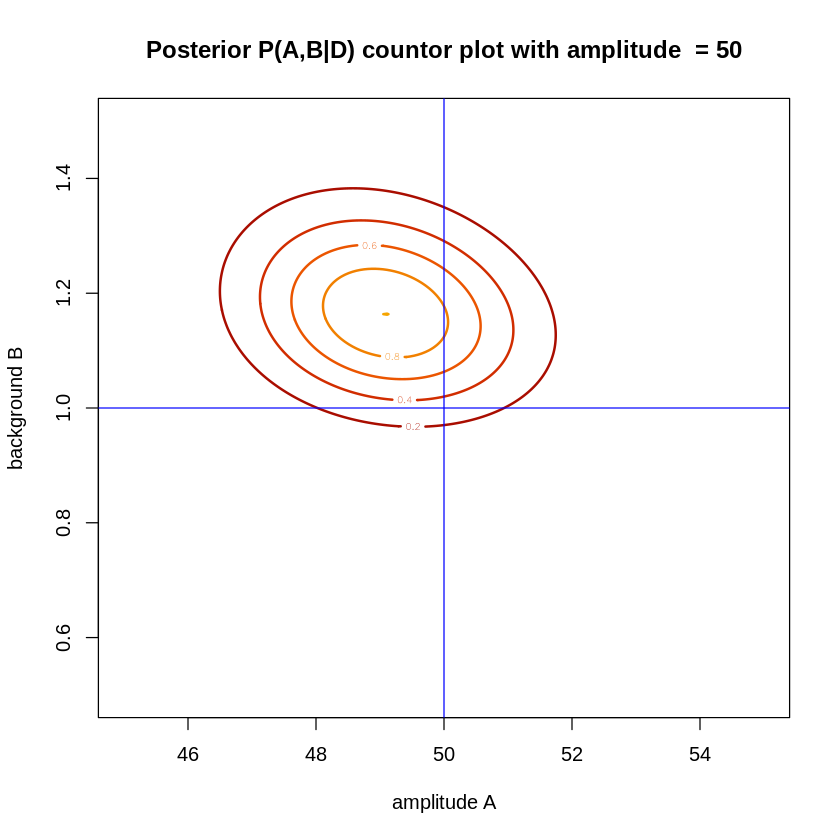

In [28]:
A_true_vec<-c(0.5,1,2,5,10,20,30,50)

for (A_true in A_true_vec) {
  
  set.seed(1)
  xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
  s_true <- signal(xdat, A_true, B_true, x0, w, Delta_t) 
  ddat <- rpois(length(s_true), s_true)
  xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
  splot <- signal(xplot, A_true, B_true, x0, w, Delta_t) 
  plot(xplot, splot,xlab="x", ylab="Signal+Background counts",type='l', lwd=3, col='darkblue',main =sprintf('Observed data, signal amplitude = %g',A_true), cex.lab=1, cex.axis=1)
  par(new=TRUE)
  xdat_off <- xdat-0.25
  plot(xdat_off, ddat, type='s',col='firebrick3',lwd=2,xlim=range(xplot), ylim=range(c(splot, ddat)),xlab='',ylab='',xaxt ="n",yaxt ="n")
  
  z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
  for(j in 1:length(a)) {
    for(k in 1:length(b)) {
      z[j,k] <- log_post(ddat, xdat, a[j], b[k], x0, w, Delta_t)
    } 
  }

  z <- z - max(z)
  
  cols <- hcl.colors(10, "YlOrRd")
  
  if (A_true<20) {
    
    contour(a, b, exp(z),
          nlevels = 5,
          labcex = 0.5,
          xlim=c(0,12),
          main=sprintf("Posterior P(A,B|D) countor plot with amplitude  = %g",A_true),
          lwd = 2, xlab="amplitude A", ylab="background B",col = cols)
    
  }
  
  else if (A_true>=20 && A_true<=40 ) {
    
    contour(a, b, exp(z),
          nlevels = 5,
          labcex = 0.5,
          xlim=c(15,35),
          main=sprintf("Posterior P(A,B|D) countor plot with amplitude  = %g",A_true),
          lwd = 2, xlab="amplitude A", ylab="background B",col = cols)
    
    
  }  else if (A_true>=45 ) {
    
    contour(a, b, exp(z),
          nlevels = 5,
          labcex = 0.5,
          xlim=c(45,55),
          main=sprintf("Posterior P(A,B|D) countor plot with amplitude  = %g",A_true),
          lwd = 2, xlab="amplitude A", ylab="background B",col = cols)
    
    
  }
  
  
  abline(v=A_true,h=B_true,col="blue")
  
  
}

In [ ]:
for (A_true in A_true_vec) {
  
  set.seed(1)
  xdat <- seq(from=-7*w, to=7*w, by=r*w)
  s_true <- signal(xdat, A_true, B_true, x0, w, Delta_t) 
  ddat <- rpois(length(s_true), s_true)
  
  z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
  for(j in 1:length(a)) {
    for(k in 1:length(b)) {
      z[j,k] <- log_post(ddat, xdat, a[j], b[k], x0, w, Delta_t)
    } 
  }

  z <- z - max(z)
  
  p_a_D <- apply(exp(z), 1, sum)
  p_a_D <- p_a_D/(delta_a*sum(p_a_D))
  p_b_D <- apply(exp(z), 2, sum) 
  p_b_D <- p_b_D/(delta_b*sum(p_b_D))

  p_a_bD <- exp(Vectorize(log_post, "a")(ddat, xdat, a, B_true,x0, w, Delta_t))
  p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
  p_b_aD <- exp(Vectorize(log_post, "b")(ddat, xdat, A_true, b,x0, w, Delta_t))
  p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
  
  par(mfrow=c(1.5,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))

  plot(b, p_b_D, xlab="background B", yaxs="i",ylim=1.05*c(0,max(p_b_D, p_b_aD)),main= sprintf('Marginalized posterior for B, A/B = %g',A_true),ylab="P(B|D) and P(B|A,D)",type="l",cex.main=1, lwd=2,col='darkblue')
  lines(b, p_b_aD, lwd=2, lty=2,col='darkgreen') 
  abline(v=B_true, col="red")
  legend("topleft", inset=c(0,0), legend=c("marginalized conditional posterior","marginalized conditional posterior","B true"),col=c("darkblue","darkgreen","red"), lty = c(1,1), lwd = c(3,2), cex=0.7, box.lty = 0)
  
  if (A_true<2){
    x1=0
    x2=4
  } else if (A_true==2){
    x1= 0
    x2= 6
  } else if (A_true==5){
     x1= 1
     x2= 8
  } else if (A_true==10){
    x1=6
    x2=14
  } else if (A_true==20){
    x1=16
    x2=24 
  } else if (A_true==30){
    x1=25
    x2=35
  } else {
    x1=42
    x2=58
  }
  
  
  plot(a, p_a_D, xlab="amplitude A", yaxs="i",ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)",main= sprintf('Marginalized posterior for A, A/B = %g',A_true),type="l", xlim=c(x1,x2), lwd=2,cex.main=1,col='darkorchid')
  lines(a, p_a_bD, lwd=2, lty=2,col='darkorange') 
  abline(v=A_true, col="red")
  legend("topleft", inset=c(0,0), legend=c("marginalized conditional posterior","marginalized conditional posterior","A true"),col=c("darkorchid","darkorange","red"), lty = c(1,1), lwd = c(3,2), cex=0.7, box.lty = 0)
  
}

Depending on the ratio A/B the marginalized posteriors change. For
higher values of the ratio the marginalized posteriors of A tend to be
more peaked (even if not strongly) than the ones with a low A/B ratio.
They also tend to be peaked around the true value. Surely also with an
higher value of the A/B ratio the B marginalized posteriors tend to be
more peaked arounf the true value, but the best results in the cse of B
are obtained with a value of A/B equal to 2 or 5.